# Masters thesis Notebook 1: Using time series to predict covid 19 vaccination rates in Ireland

In [1]:
#Reading in libraries for data maniputaltion and exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Section 1: Initial data exploration

In [2]:
#assigning the vaccination levels df from data.gov

df = pd.read_csv("COVID-19_HSE_Daily_Vaccination_Figures.csv")

In [3]:
df

,X,Y,VaccinationDate,VaccineText,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
0,-856336.3149,7036491.651,2022/07/10 23:00:00+00,Mon 11 Jul 2022,11,16,0,3857139,3810721,241196,4098335,4051917,85.408331,84.440991,1
1,-856336.3149,7036491.651,2020/12/28 00:00:00+00,Mon 28 Dec 2020,297,23,4,297,23,4,301,27,0.006273,0.000563,2
2,-856336.3149,7036491.651,2021/11/29 00:00:00+00,Mon 29 Nov 2021,537,1005,2,3665034,3602273,241086,3906120,3843359,81.402616,80.094692,3
3,-856336.3149,7036491.651,2022/07/11 23:00:00+00,Tue 12 Jul 2022,44,81,0,3857183,3810802,241196,4098379,4051998,85.409248,84.442679,4
4,-856336.3149,7036491.651,2020/12/29 00:00:00+00,Tue 29 Dec 2020,81,3,0,378,26,4,382,30,0.007961,0.000625,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-856336.3149,7036491.651,2022/07/05 23:00:00+00,Wed 06 Jul 2022,60,83,0,3856699,3810174,241196,4097895,4051370,85.399162,84.429592,780
780,-856336.3149,7036491.651,2022/07/06 23:00:00+00,Thu 07 Jul 2022,77,77,0,3856776,3810251,241196,4097972,4051447,85.400766,84.431196,781
781,-856336.3149,7036491.651,2022/07/07 23:00:00+00,Fri 08 Jul 2022,99,91,0,3856875,3810342,241196,4098071,4051538,85.402829,84.433093,782
782,-856336.3149,7036491.651,2022/07/08 23:00:00+00,Sat 09 Jul 2022,119,144,0,3856994,3810486,241196,4098190,4051682,85.405309,84.436094,783


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'Dose1'}>,
        <Axes: title={'center': 'Dose2'}>],
       [<Axes: title={'center': 'SingleDose'}>,
        <Axes: title={'center': 'Dose1Cum'}>,
        <Axes: title={'center': 'Dose2Cum'}>,
        <Axes: title={'center': 'SingleDoseCum'}>],
       [<Axes: title={'center': 'PartiallyVacc'}>,
        <Axes: title={'center': 'FullyVacc'}>,
        <Axes: title={'center': 'PartialPercent'}>,
        <Axes: title={'center': 'FullyPercent'}>],
       [<Axes: title={'center': 'ObjectId'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

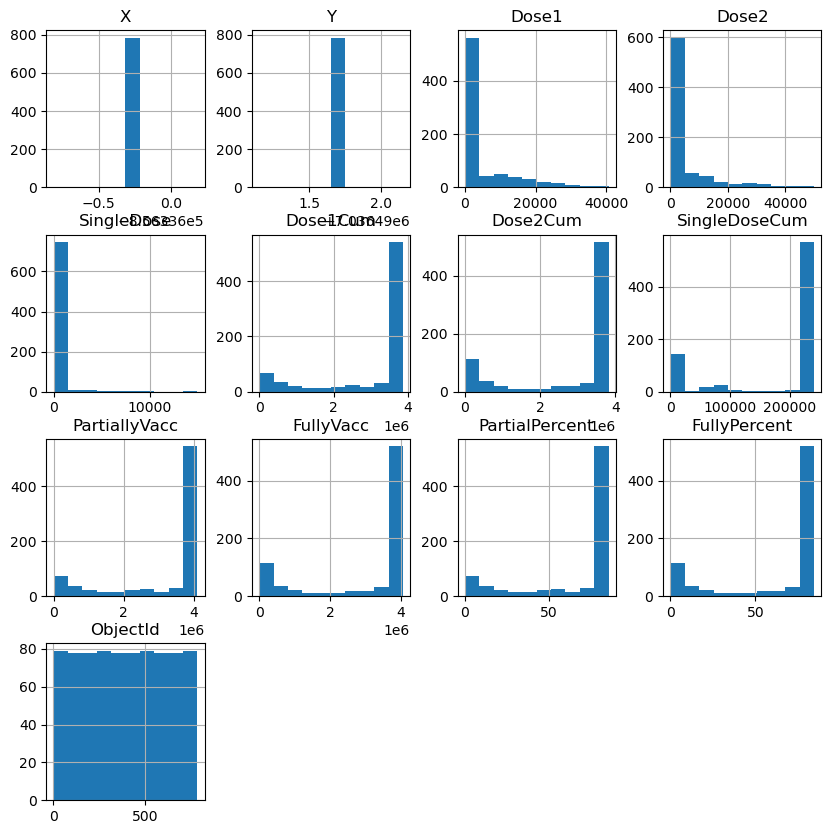

In [4]:
#visualiaing the distribution of variables

df.hist(figsize = (10,10))

In [5]:
#checking the data types in the dataset

df.dtypes

X                  float64
Y                  float64
VaccinationDate     object
VaccineText         object
Dose1                int64
Dose2                int64
SingleDose           int64
Dose1Cum             int64
Dose2Cum             int64
SingleDoseCum        int64
PartiallyVacc        int64
FullyVacc            int64
PartialPercent     float64
FullyPercent       float64
ObjectId             int64
dtype: object

In [6]:
#covnverting date column to datetime type

df['VaccinationDate'] = pd.to_datetime(df['VaccinationDate'])

In [7]:
#looking at the decriptive statistics

df.describe()

,X,Y,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
count,7.840000e+02,7.840000e+02,784.000000,784.000000,784.000000,7.840000e+02,7.840000e+02,784.000000,7.840000e+02,7.840000e+02,784.000000,784.000000,784.000000
mean,-8.563363e+05,7.036492e+06,4932.389031,4871.732143,307.664541,3.063717e+06,2.862487e+06,183974.614796,3.247692e+06,3.046462e+06,67.681127,63.487541,392.500000
std,2.446282e-09,2.050218e-08,8405.263864,9356.614310,1367.166368,1.273884e+06,1.412759e+06,96857.934500,1.368277e+06,1.508562e+06,28.514577,31.438079,226.465597
min,-8.563363e+05,7.036492e+06,1.000000,0.000000,0.000000,2.970000e+02,2.300000e+01,4.000000,3.010000e+02,2.700000e+01,0.006273,0.000563,1.000000
25%,-8.563363e+05,7.036492e+06,58.000000,42.750000,0.000000,2.739961e+06,2.192091e+06,123827.250000,2.863788e+06,2.315918e+06,59.680664,48.263183,196.750000
50%,-8.563363e+05,7.036492e+06,689.500000,693.500000,0.000000,3.801228e+06,3.659248e+06,241153.000000,4.042381e+06,3.900402e+06,84.242263,81.283444,392.500000
75%,-8.563363e+05,7.036492e+06,6672.500000,4094.000000,6.000000,3.858865e+06,3.813037e+06,241199.000000,4.100064e+06,4.054236e+06,85.444358,84.489318,588.250000
max,-8.563363e+05,7.036492e+06,40618.000000,50146.000000,14937.000000,3.866993e+06,3.819438e+06,241209.000000,4.108202e+06,4.060647e+06,85.613957,84.622922,784.000000


In [8]:
df.dtypes

X                              float64
Y                              float64
VaccinationDate    datetime64[ns, UTC]
VaccineText                     object
Dose1                            int64
Dose2                            int64
SingleDose                       int64
Dose1Cum                         int64
Dose2Cum                         int64
SingleDoseCum                    int64
PartiallyVacc                    int64
FullyVacc                        int64
PartialPercent                 float64
FullyPercent                   float64
ObjectId                         int64
dtype: object

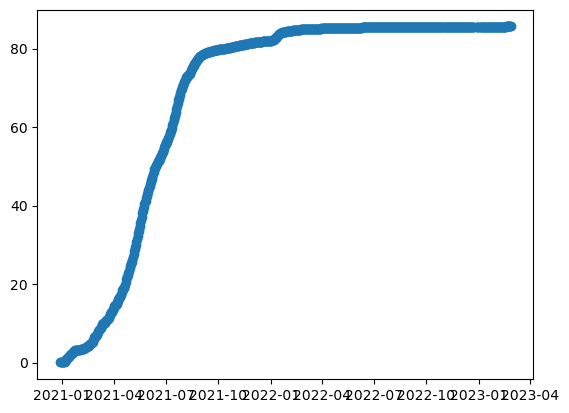

In [9]:
#visualising partial percentage of vaccinations

plt.scatter(df['VaccinationDate'], df['PartialPercent'])


Text(0.5, 0, 'Date')

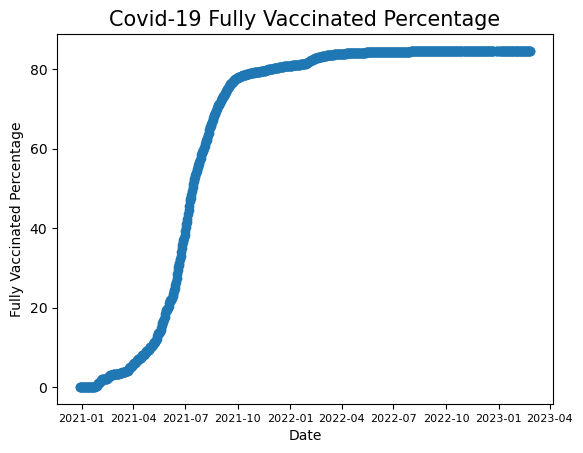

In [10]:
#visualising fully vaccinated percentage of vaccinations

plt.scatter(df['VaccinationDate'], df['FullyPercent'])
plt.xticks(fontsize=8)
plt.title('Covid-19 Fully Vaccinated Percentage', fontsize =15)
plt.ylabel('Fully Vaccinated Percentage')
plt.xlabel('Date')

The initial EDA has shown that the variable of inerest, fully vaccinated percentage, is labelled fullypercent in the dataframe

In [11]:
#Checking the dataset for null values

df.isnull().any()

X                  False
Y                  False
VaccinationDate    False
VaccineText        False
Dose1              False
Dose2              False
SingleDose         False
Dose1Cum           False
Dose2Cum           False
SingleDoseCum      False
PartiallyVacc      False
FullyVacc          False
PartialPercent     False
FullyPercent       False
ObjectId           False
dtype: bool

In [12]:
#Checking for duplicates

df.duplicated().any()

False

(array([115.,  33.,  20.,  10.,  11.,  10.,  17.,  18.,  30., 520.]),
 array([5.62674000e-04, 8.46279863e+00, 1.69250346e+01, 2.53872705e+01,
        3.38495065e+01, 4.23117424e+01, 5.07739784e+01, 5.92362143e+01,
        6.76984503e+01, 7.61606862e+01, 8.46229222e+01]),
 <BarContainer object of 10 artists>)

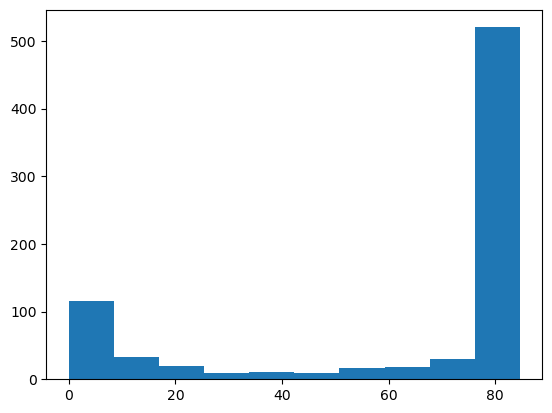

In [13]:
#Visualising spread of fully percent

plt.hist(df['FullyPercent'])

In [14]:
#Sorting from the first to last date in the dataframe

df1 = df.sort_values(by='VaccinationDate')

In [15]:
df1

,X,Y,VaccinationDate,VaccineText,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
1,-856336.3149,7036491.651,2020-12-28 00:00:00+00:00,Mon 28 Dec 2020,297,23,4,297,23,4,301,27,0.006273,0.000563,2
4,-856336.3149,7036491.651,2020-12-29 00:00:00+00:00,Tue 29 Dec 2020,81,3,0,378,26,4,382,30,0.007961,0.000625,5
7,-856336.3149,7036491.651,2020-12-30 00:00:00+00:00,Wed 30 Dec 2020,1066,2,0,1444,28,4,1448,32,0.030176,0.000667,8
10,-856336.3149,7036491.651,2020-12-31 00:00:00+00:00,Thu 31 Dec 2020,1042,1,0,2486,29,4,2490,33,0.051891,0.000688,11
13,-856336.3149,7036491.651,2021-01-01 00:00:00+00:00,Fri 01 Jan 2021,824,0,0,3310,29,4,3314,33,0.069063,0.000688,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,-856336.3149,7036491.651,2023-02-22 00:00:00+00:00,Wed 22 Feb 2023,24,16,0,3866832,3819359,241209,4108041,4060568,85.610602,84.621276,668
668,-856336.3149,7036491.651,2023-02-23 00:00:00+00:00,Thu 23 Feb 2023,21,10,0,3866853,3819369,241209,4108062,4060578,85.611040,84.621484,669
669,-856336.3149,7036491.651,2023-02-24 00:00:00+00:00,Fri 24 Feb 2023,13,12,0,3866866,3819381,241209,4108075,4060590,85.611310,84.621734,670
670,-856336.3149,7036491.651,2023-02-25 00:00:00+00:00,Sat 25 Feb 2023,49,19,0,3866915,3819400,241209,4108124,4060609,85.612332,84.622130,671


In [16]:
import plotly.express as px

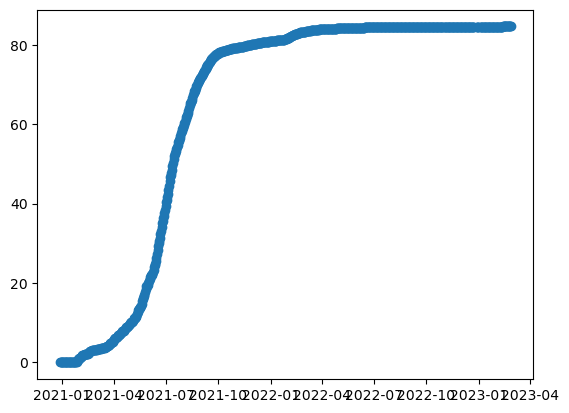

In [17]:
plt.scatter(x=df1['VaccinationDate'], y=df1['FullyPercent'])
#px.scatter(x=df1['VaccinationDate'], y=df1['FullyPercent'])

In [18]:
#Creating a new truncated dataset for predicitionas

df2 = df1[(df1['VaccinationDate'] > "2020-12-28") & (df1['VaccinationDate'] < "2021-09-05")]

Text(0.5, 0, 'Date')

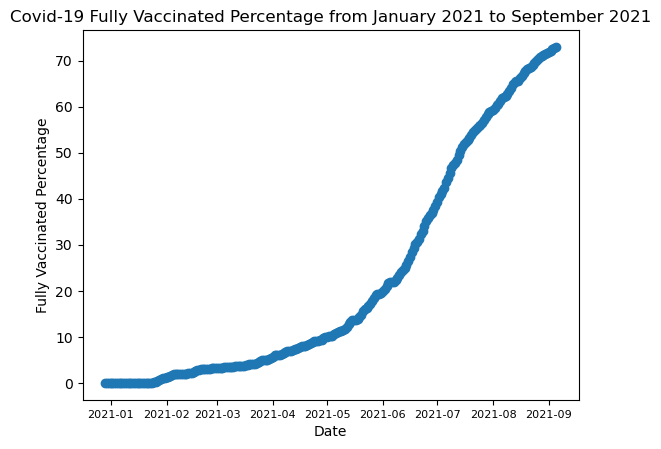

In [19]:
#Visualising the truncated dataset

plt.scatter(x=df2['VaccinationDate'], y=df2['FullyPercent'])
plt.xticks(fontsize=8)
plt.title('Covid-19 Fully Vaccinated Percentage from January 2021 to September 2021', fontsize =12)
plt.ylabel('Fully Vaccinated Percentage')
plt.xlabel('Date')
#px.scatter(x=df1['VaccinationDate'], y=df1['FullyPercent'])

In [20]:
#Assessing the shape of the datafrmae post truncation

df2.shape

(251, 15)

In [21]:
#Assessing the shape of the datafrmae pre truncation

df1.shape

(784, 15)

In [22]:
#Reseting the index

df3 = df2.reset_index()

In [23]:
df3

,index,X,Y,VaccinationDate,VaccineText,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
0,4,-856336.3149,7036491.651,2020-12-29 00:00:00+00:00,Tue 29 Dec 2020,81,3,0,378,26,4,382,30,0.007961,0.000625,5
1,7,-856336.3149,7036491.651,2020-12-30 00:00:00+00:00,Wed 30 Dec 2020,1066,2,0,1444,28,4,1448,32,0.030176,0.000667,8
2,10,-856336.3149,7036491.651,2020-12-31 00:00:00+00:00,Thu 31 Dec 2020,1042,1,0,2486,29,4,2490,33,0.051891,0.000688,11
3,13,-856336.3149,7036491.651,2021-01-01 00:00:00+00:00,Fri 01 Jan 2021,824,0,0,3310,29,4,3314,33,0.069063,0.000688,14
4,16,-856336.3149,7036491.651,2021-01-02 00:00:00+00:00,Sat 02 Jan 2021,1021,0,0,4331,29,4,4335,33,0.090340,0.000688,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,472,-856336.3149,7036491.651,2021-08-31 23:00:00+00:00,Wed 01 Sep 2021,5006,12577,184,3512779,3211652,237899,3750678,3449551,78.163242,71.887826,473
247,473,-856336.3149,7036491.651,2021-09-01 23:00:00+00:00,Thu 02 Sep 2021,5016,12393,249,3517795,3224045,238148,3755943,3462193,78.272963,72.151283,474
248,474,-856336.3149,7036491.651,2021-09-02 23:00:00+00:00,Fri 03 Sep 2021,4790,16123,167,3522585,3240168,238315,3760900,3478483,78.376266,72.490762,475
249,475,-856336.3149,7036491.651,2021-09-03 23:00:00+00:00,Sat 04 Sep 2021,4634,10599,136,3527219,3250767,238451,3765670,3489218,78.475671,72.714477,476


## Section 2: Application of LSTM to covid-19 vaccination percentage

# -------------------------------------------------------------------------------------------

In [24]:
#Filtering the dataset to isolate fully vaccinated percentage

data =df2.filter(['FullyPercent'])

In [25]:
#Isolating the values

dataset = data.values

In [26]:
#Visualising

dataset

array([[6.25193000e-04],
       [6.66872000e-04],
       [6.87712000e-04],
       [6.87712000e-04],
       [6.87712000e-04],
       [7.71071000e-04],
       [8.75270000e-04],
       [1.16702700e-03],
       [1.45878300e-03],
       [1.64634100e-03],
       [1.81305900e-03],
       [1.95893800e-03],
       [2.10481600e-03],
       [2.27153400e-03],
       [2.58413100e-03],
       [2.68832900e-03],
       [2.81336800e-03],
       [2.91756700e-03],
       [2.98008600e-03],
       [3.08428500e-03],
       [3.29268300e-03],
       [3.73031800e-03],
       [2.38615290e-02],
       [4.40135800e-02],
       [6.42698300e-02],
       [7.38769610e-02],
       [8.22128660e-02],
       [1.09179520e-01],
       [1.82285409e-01],
       [3.22141061e-01],
       [5.62736128e-01],
       [8.02935239e-01],
       [9.65381194e-01],
       [1.05057415e+00],
       [1.22433609e+00],
       [1.33091064e+00],
       [1.47414233e+00],
       [1.69385596e+00],
       [1.87341136e+00],
       [1.95408208e+00],


In [27]:
#Assessing descriptive statistics

data.describe()

,FullyPercent
count,251.000000
mean,22.621925
std,24.266203
min,0.000625
25%,3.238645
50%,10.115475
75%,42.004085
max,72.962783


In [28]:
#Importing necessary libraries for LSTM implementation

import math
import numpy as np
import pandas as pd
from datetime import datetime
import time
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

2023-09-16 11:23:15.590775: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
#Assiging 80% of the data as the training data

training_data_len = math.ceil( len(dataset) * .8 )

In [30]:
training_data_len 

201

In [31]:
#Scaling the data between 0 and 1

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [32]:
dataset

array([[0.00000000e+00],
       [5.71241330e-07],
       [8.56868848e-07],
       [8.56868848e-07],
       [8.56868848e-07],
       [1.99936521e-06],
       [3.42748910e-06],
       [7.42623323e-06],
       [1.14249637e-05],
       [1.39955839e-05],
       [1.62805766e-05],
       [1.82799556e-05],
       [2.02793208e-05],
       [2.25643135e-05],
       [2.68486852e-05],
       [2.82767953e-05],
       [2.99905467e-05],
       [3.14186706e-05],
       [3.22755395e-05],
       [3.37036633e-05],
       [3.65599111e-05],
       [4.25580205e-05],
       [3.18471064e-04],
       [5.94669735e-04],
       [8.72296530e-04],
       [1.00396932e-03],
       [1.11821903e-03],
       [1.48781684e-03],
       [2.48978678e-03],
       [4.40661129e-03],
       [7.70414353e-03],
       [1.09962489e-02],
       [1.32226901e-02],
       [1.43903221e-02],
       [1.67718573e-02],
       [1.82325399e-02],
       [2.01956355e-02],
       [2.32069722e-02],
       [2.56679109e-02],
       [2.67735625e-02],


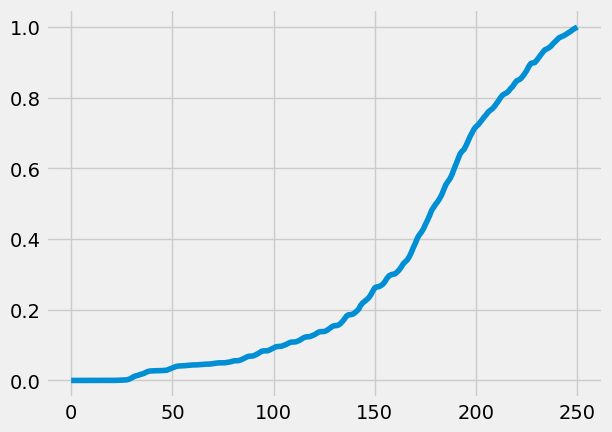

In [33]:
#Visualising scaled data

plt.plot(dataset)

In [34]:
train_data = dataset[0:training_data_len , :]

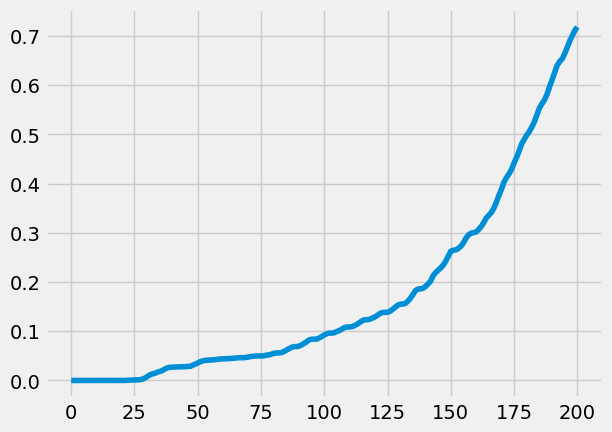

In [35]:
#Visualising training data

plt.plot(train_data)

In [36]:
x_train =[]
y_train =[]

In [37]:
#Defining x and y train, setting the time step = 10

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])

In [38]:
y_train

[1.628057663717971e-05,
 1.827995555639715e-05,
 2.0279320769879558e-05,
 2.256431350121233e-05,
 2.6848685151762532e-05,
 2.8276795329544246e-05,
 2.9990546730911333e-05,
 3.141867061442806e-05,
 3.2275539462244093e-05,
 3.3703663345760834e-05,
 3.6559911112794294e-05,
 4.255802045897656e-05,
 0.0003184710640890958,
 0.0005946697352370654,
 0.0008722965302685518,
 0.0010039693220724461,
 0.0011182190271677595,
 0.0014878168413111975,
 0.0024897867844644265,
 0.0044066112920509186,
 0.007704143527859407,
 0.010996248895651681,
 0.013222690110214054,
 0.014390322136034788,
 0.016771857324750086,
 0.01823253985339167,
 0.020195635484346254,
 0.023206972195527892,
 0.02566791094333281,
 0.026773562496772502,
 0.02714544530364727,
 0.027397651537410514,
 0.027557315510731838,
 0.027724691331094974,
 0.027853793502649687,
 0.028004603118857795,
 0.028552716103208916,
 0.028560999205286434,
 0.030816859711544017,
 0.03315041002548985,
 0.0355687907528358,
 0.03795746654726294,
 0.03984144424

In [39]:
df2

,X,Y,VaccinationDate,VaccineText,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
4,-856336.3149,7036491.651,2020-12-29 00:00:00+00:00,Tue 29 Dec 2020,81,3,0,378,26,4,382,30,0.007961,0.000625,5
7,-856336.3149,7036491.651,2020-12-30 00:00:00+00:00,Wed 30 Dec 2020,1066,2,0,1444,28,4,1448,32,0.030176,0.000667,8
10,-856336.3149,7036491.651,2020-12-31 00:00:00+00:00,Thu 31 Dec 2020,1042,1,0,2486,29,4,2490,33,0.051891,0.000688,11
13,-856336.3149,7036491.651,2021-01-01 00:00:00+00:00,Fri 01 Jan 2021,824,0,0,3310,29,4,3314,33,0.069063,0.000688,14
16,-856336.3149,7036491.651,2021-01-02 00:00:00+00:00,Sat 02 Jan 2021,1021,0,0,4331,29,4,4335,33,0.090340,0.000688,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,-856336.3149,7036491.651,2021-08-31 23:00:00+00:00,Wed 01 Sep 2021,5006,12577,184,3512779,3211652,237899,3750678,3449551,78.163242,71.887826,473
473,-856336.3149,7036491.651,2021-09-01 23:00:00+00:00,Thu 02 Sep 2021,5016,12393,249,3517795,3224045,238148,3755943,3462193,78.272963,72.151283,474
474,-856336.3149,7036491.651,2021-09-02 23:00:00+00:00,Fri 03 Sep 2021,4790,16123,167,3522585,3240168,238315,3760900,3478483,78.376266,72.490762,475
475,-856336.3149,7036491.651,2021-09-03 23:00:00+00:00,Sat 04 Sep 2021,4634,10599,136,3527219,3250767,238451,3765670,3489218,78.475671,72.714477,476


In [40]:
#Converting training sets to arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [41]:
#Reshaping the dataset for applying lstm

x_train =np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(191, 10, 1)

In [42]:
#Importing necessary libraries for LSTM

from keras.layers import Bidirectional
from keras.layers import LSTM,Dense ,Dropout
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Flatten, LSTM, Bidirectional, Input, Dropout, InputLayer, BatchNormalization

In [43]:
#LSTM architecture

model = Sequential()
model.add(LSTM(20, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(20, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Dense(1))

2023-09-16 11:23:31.394966: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [44]:
#Compiling LSTM

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [45]:
x_train.shape

(191, 10, 1)

In [46]:
y_train.shape

(191,)

In [47]:
#fitting the model

model.fit(x_train, y_train, batch_size = 5, epochs = 20)

Epoch 1/20
39/39 [==============================] - 3s 6ms/step - loss: 0.0134 - accuracy: 0.0000e+00
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 8/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 9/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 10/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0015 - 

In [48]:
history = model.fit(x_train, y_train, batch_size = 5, epochs = 20)

Epoch 1/20
39/39 [==============================] - 0s 5ms/step - loss: 6.4623e-04 - accuracy: 0.0000e+00
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 9.5919e-04 - accuracy: 0.0000e+00
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 6.3782e-04 - accuracy: 0.0000e+00
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 8.8308e-04 - accuracy: 0.0000e+00
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 7.8893e-04 - accuracy: 0.0000e+00
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 7.0074e-04 - accuracy: 0.0000e+00
Epoch 8/20
39/39 [==============================] - 0s 5ms/step - loss: 7.8544e-04 - accuracy: 0.0000e+00
Epoch 9/20
39/39 [==============================] - 0s 5ms/step - loss: 7.4442e-04 - accuracy: 0.0000e+00
Epoch 10/20
39/39 [==============================]

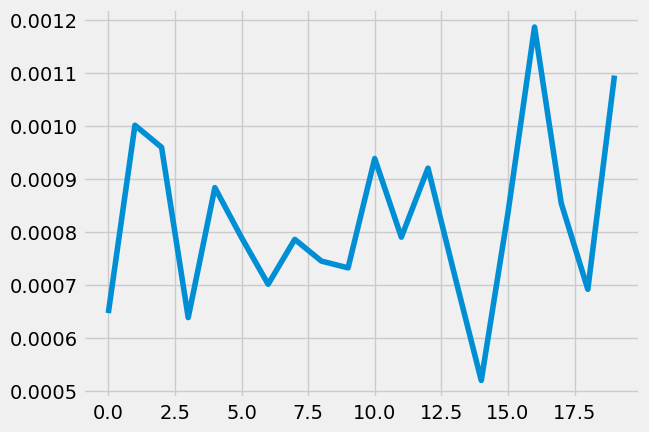

In [49]:
#visualising loss

plt.plot(history.history['loss'])

In [50]:
#assigining test data

test_data = dataset[training_data_len -10: , :]

In [51]:
test_data

array([[0.62530694],
       [0.64006143],
       [0.6481346 ],
       [0.65335838],
       [0.66417897],
       [0.67705777],
       [0.68993372],
       [0.70091825],
       [0.71137924],
       [0.71827393],
       [0.72335118],
       [0.73041324],
       [0.73781377],
       [0.74545736],
       [0.75199559],
       [0.75956063],
       [0.76444823],
       [0.76864891],
       [0.77486466],
       [0.78275075],
       [0.79091589],
       [0.79973111],
       [0.80690028],
       [0.81073336],
       [0.8135142 ],
       [0.818227  ],
       [0.82581946],
       [0.83122347],
       [0.8402215 ],
       [0.84756861],
       [0.85016036],
       [0.85363298],
       [0.86039057],
       [0.86803416],
       [0.877153  ],
       [0.88834547],
       [0.89666457],
       [0.8984203 ],
       [0.89950481],
       [0.90623669],
       [0.91406851],
       [0.92162527],
       [0.92913433],
       [0.93569798],
       [0.93805381],
       [0.94160383],
       [0.94609213],
       [0.952

In [52]:
#assigining test data

x_test = []
y_test = dataset[training_data_len:, :]

In [53]:
#setting time step for test data

for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i, 0])

In [54]:
#converting test data to array

x_test = np.array(x_test)

In [55]:
#Reshaping in tensor format

x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [56]:
#making predictions with the LSTM

predictions = model.predict(x_test)

2/2 [==============================] - 1s 3ms/step


In [57]:
#transforming the predictions back from scaled to compare against real data

predictions = scaler.inverse_transform(predictions)

In [58]:
#calculating accuracy of the model based on RMSE and R squared

rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test),predictions))
r2_value = r2_score(scaler.inverse_transform(y_test),predictions)

In [59]:
print("Root Mean Square Error: ", rmse)
print("R^2 Value: ", r2_value)

Root Mean Square Error:  0.5550941317960592
R^2 Value:  0.9918138667699264


In [60]:
#defining a function for mean absolute percentage error -MAPE

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [61]:
MAPE_LSTM=MAPE(scaler.inverse_transform(y_test),predictions)

In [62]:
MAPE_LSTM

0.8123977779264611

In [184]:
#assessing train and test RMSE

def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 

# Mean square error
print_error(y_train, y_test, train_predict, test_predict)

Train RMSE: 0.007 RMSE
Test RMSE: 0.044 RMSE


In [66]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/var/folders/yy/l_574phs7hb1lhs37q6r9mwm0000gn/T/ipykernel_68900/2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [67]:
#transforming training data back

train_data_inv_trans = scaler.inverse_transform(train_data)

In [68]:
valid[['FullyPercent']].index

Int64Index([427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
            440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
            453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
            466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476],
           dtype='int64')

In [69]:
valid.index = pd.RangeIndex(start=201, stop=201+len(valid[['FullyPercent']]), step=1)

In [70]:
valid[['FullyPercent']]

,FullyPercent
201,52.777888
202,53.293151
203,53.833110
204,54.390803
205,54.867846
206,55.419808
207,55.776418
208,56.082908
209,56.536423
210,57.111809


In [71]:
valid[['Predictions']]

,Predictions
201,52.881413
202,53.579876
203,54.225334
204,54.849266
205,55.464020
206,56.041691
207,56.579456
208,57.074444
209,57.531593
210,57.958897


In [72]:
valid[['Predictions']].index = pd.RangeIndex(start=201, stop=201+len(valid[['Predictions']]), step=1)

In [73]:
valid[['Predictions']]

,Predictions
201,52.881413
202,53.579876
203,54.225334
204,54.849266
205,55.464020
206,56.041691
207,56.579456
208,57.074444
209,57.531593
210,57.958897


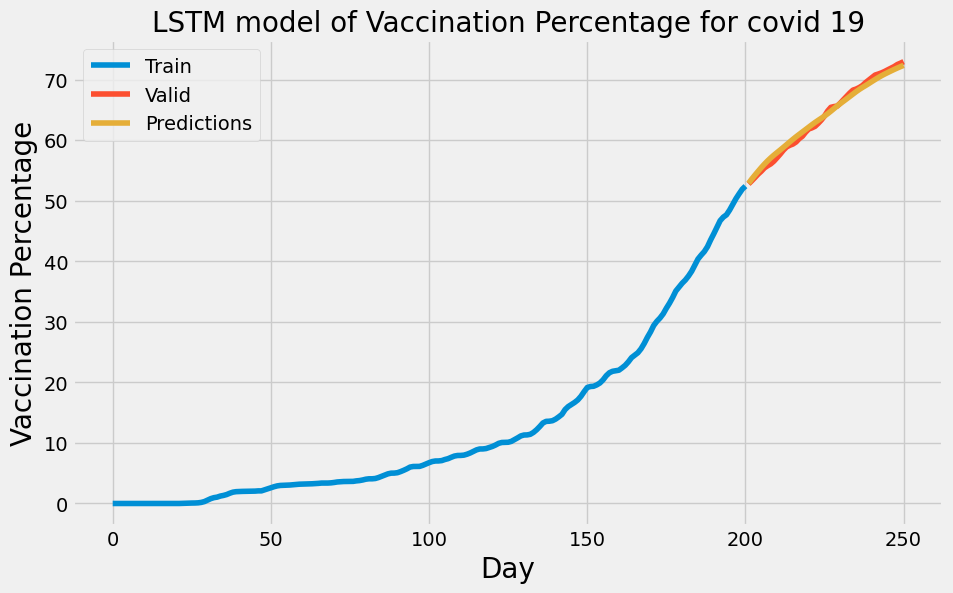

In [74]:
#Plotting training data, and predicted vs actual values for 50 days going forward

overall =plt.figure(figsize=(10,6))
plt.title('LSTM model of Vaccination Percentage for covid 19',fontsize=20 )
plt.xlabel('Day',fontsize=20)
plt.ylabel('Vaccination Percentage', fontsize=20)

plt.plot(train_data_inv_trans)
plt.plot(valid[['FullyPercent', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc = 'upper left')
plt.show()

## Section 2.1: Addition of a Conv1D layer to LSTM

# ------------------------------------------------------------------------

In [75]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout

In [76]:
from keras.optimizers import SGD

In [77]:
#Model architecture for LSTM with Conv1D layer

model = Sequential()

model.add(Conv1D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape = (x_train.shape[1], 1)))
model.add(LSTM(20, return_sequences = True))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(20, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Dense(1))

In [78]:
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [79]:
#Compiling the model

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [80]:
#Fitting the model

model.fit(x_train, y_train, batch_size = 5, epochs = 20)

Epoch 1/20
39/39 [==============================] - 3s 6ms/step - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 9.2670e-04 - accuracy: 0.0000e+00
Epoch 8/20
39/39 [==============================] - 0s 5ms/step - loss: 9.6712e-04 - accuracy: 0.0000e+00
Epoch 9/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 10/20
39/39 [==============================] - 0s 5ms/step - loss: 0

In [81]:
test_data = dataset[training_data_len -10: , :]

In [82]:
x_test = []
y_test = dataset[training_data_len:, :]

In [83]:
for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i, 0])

In [84]:
x_test = np.array(x_test)

In [85]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [86]:
predictions = model.predict(x_test)

2/2 [==============================] - 1s 4ms/step


In [87]:
#Making predictions

predictions = scaler.inverse_transform(predictions)

In [88]:
#calculating accuracy of the model based on RMSE and R squared

rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test),predictions))
r2_value = r2_score(scaler.inverse_transform(y_test),predictions)

In [89]:
print("Root Mean Square Error: ", rmse)
print("R^2 Value: ", r2_value)

Root Mean Square Error:  1.6855165667004184
R^2 Value:  0.9245235287929474


## Section 3: Application of Simple RNN to covid-19 vaccincation data


# -------------------------------------------------------------------------------------------

In [90]:
from keras.layers import Dense, SimpleRNN

In [91]:
#Model architecture for SimpleRNN

model = Sequential()
model.add(SimpleRNN(100, input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
    
 
model.fit(x_train, y_train, batch_size = 5, epochs=20)

Epoch 1/20
39/39 [==============================] - 1s 2ms/step - loss: 0.0118
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 2.3724e-05
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 2.3994e-05
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 2.1348e-05
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 2.3250e-05
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 1.4936e-05
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 3.4678e-05
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 2.6919e-05
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 2.5185e-05
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 7.5451e-05
Epoch 11/20
39/39 [==============================] - 0s 2ms/step - loss: 1.3191e-04
Epoch 12/20
39/39 [==============================] - 0s 2ms/step - loss: 4.8135e-05
Epoch

In [92]:
#Visualises training and test RMSE and making predictions

def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
# Mean square error
print_error(y_train, y_test, train_predict, test_predict)

2/2 [==============================] - 0s 2ms/step
Train RMSE: 0.007 RMSE
Test RMSE: 0.044 RMSE


In [93]:
#Assigning test data

test_data = dataset[training_data_len -30: , :]

In [94]:
#Assigning test data
x_test = []
y_test = dataset[training_data_len:, :]

In [95]:
#setting time step

for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [96]:
x_test = np.array(x_test)

In [97]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [98]:
predictions = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [99]:
#Inverse scaling predictions

predictions = scaler.inverse_transform(predictions)

In [100]:
#Calculating accruacy metrics

rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test),predictions))
r2_value = r2_score(scaler.inverse_transform(y_test),predictions)

In [101]:
print("Root Mean Square Error: ", rmse)
print("R^2 Value: ", r2_value)

Root Mean Square Error:  3.1948034061492514
R^2 Value:  0.7288348873068391


In [102]:
#Calculating MAPE for SimpleRNN

MAPE_RNN=MAPE(scaler.inverse_transform(y_test),predictions)

In [103]:
MAPE_RNN

4.894351494651415

In [104]:
#Setting train valid and predictions

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/var/folders/yy/l_574phs7hb1lhs37q6r9mwm0000gn/T/ipykernel_68900/2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [105]:
valid.index = pd.RangeIndex(start=201, stop=201+len(valid[['FullyPercent']]), step=1)

In [106]:
valid[['Predictions']].index = pd.RangeIndex(start=201, stop=201+len(valid[['Predictions']]), step=1)

In [107]:
train_data_inv_trans = scaler.inverse_transform(train_data)

In [108]:
#Printing training and testing error and making predicitons with the simple RNN

def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
# Mean square error
print_error(y_train, y_test, train_predict, test_predict)

2/2 [==============================] - 0s 3ms/step
Train RMSE: 0.007 RMSE
Test RMSE: 0.044 RMSE


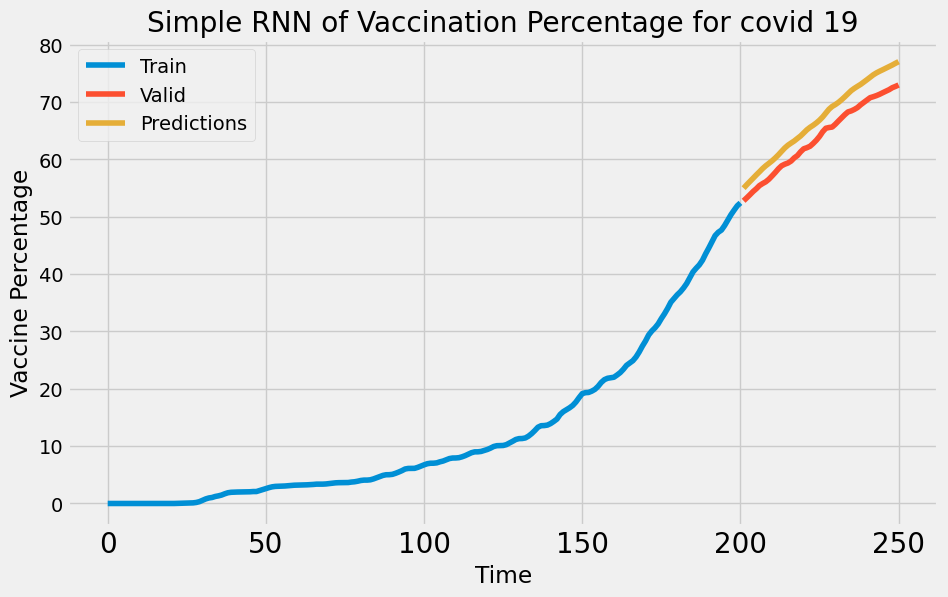

In [109]:
#Visualising training data and valid vs predicted values for Simple RNN

plt.figure(figsize=(10,6))
plt.title('Simple RNN of Vaccination Percentage for covid 19' )
plt.xlabel('Time')
plt.ylabel('Vaccine Percentage')
plt.xticks(fontsize=20)
plt.xticks(fontsize=20)
plt.plot(train_data_inv_trans)
plt.plot(valid[['FullyPercent', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'upper left')
plt.show()

## Section 4: Application of ARIMA to covid-19 vaccination percentage

# -------------------------------------------------------------------------------------------

In [110]:
#Setting ARIMA train as the first 200 values

arima_train = df3.head(200)

In [111]:
arima_train

,index,X,Y,VaccinationDate,VaccineText,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
0,4,-856336.3149,7036491.651,2020-12-29 00:00:00+00:00,Tue 29 Dec 2020,81,3,0,378,26,4,382,30,0.007961,0.000625,5
1,7,-856336.3149,7036491.651,2020-12-30 00:00:00+00:00,Wed 30 Dec 2020,1066,2,0,1444,28,4,1448,32,0.030176,0.000667,8
2,10,-856336.3149,7036491.651,2020-12-31 00:00:00+00:00,Thu 31 Dec 2020,1042,1,0,2486,29,4,2490,33,0.051891,0.000688,11
3,13,-856336.3149,7036491.651,2021-01-01 00:00:00+00:00,Fri 01 Jan 2021,824,0,0,3310,29,4,3314,33,0.069063,0.000688,14
4,16,-856336.3149,7036491.651,2021-01-02 00:00:00+00:00,Sat 02 Jan 2021,1021,0,0,4331,29,4,4335,33,0.090340,0.000688,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,421,-856336.3149,7036491.651,2021-07-11 23:00:00+00:00,Mon 12 Jul 2021,17137,31789,6095,2744245,2200038,125351,2869596,2325389,59.801701,48.460556,422
196,422,-856336.3149,7036491.651,2021-07-12 23:00:00+00:00,Tue 13 Jul 2021,20127,36600,8490,2764372,2236638,133841,2898213,2370479,60.398073,49.400221,423
197,423,-856336.3149,7036491.651,2021-07-13 23:00:00+00:00,Wed 14 Jul 2021,20810,35745,9335,2785182,2272383,143176,2928358,2415559,61.026287,50.339678,424
198,424,-856336.3149,7036491.651,2021-07-14 23:00:00+00:00,Thu 15 Jul 2021,23679,28870,9588,2808861,2301253,152764,2961625,2454017,61.719564,51.141133,425


In [112]:
#Setting arima predict as 50

arima_predict = df3.tail(50)

In [113]:
arima_predict

,index,X,Y,VaccinationDate,VaccineText,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
201,427,-856336.3149,7036491.651,2021-07-17 23:00:00+00:00,Sun 18 Jul 2021,16879,15842,1934,2860799,2364009,168548,3029347,2532557,63.130874,52.777888,428
202,428,-856336.3149,7036491.651,2021-07-18 23:00:00+00:00,Mon 19 Jul 2021,24925,18472,6253,2885724,2382481,174801,3060525,2557282,63.780616,53.293151,429
203,429,-856336.3149,7036491.651,2021-07-19 23:00:00+00:00,Tue 20 Jul 2021,30616,18210,7700,2916340,2400691,182501,3098841,2583192,64.579113,53.833110,430
204,430,-856336.3149,7036491.651,2021-07-20 23:00:00+00:00,Wed 21 Jul 2021,30387,19866,6895,2946727,2420557,189396,3136123,2609953,65.356061,54.390803,431
205,431,-856336.3149,7036491.651,2021-07-21 23:00:00+00:00,Thu 22 Jul 2021,33562,15953,6938,2980289,2436510,196334,3176623,2632844,66.200071,54.867846,432
206,432,-856336.3149,7036491.651,2021-07-22 23:00:00+00:00,Fri 23 Jul 2021,27108,20870,5616,3007397,2457380,201950,3209347,2659330,66.882032,55.419808,433
207,433,-856336.3149,7036491.651,2021-07-23 23:00:00+00:00,Sat 24 Jul 2021,15456,14835,2277,3022853,2472215,204227,3227080,2676442,67.251583,55.776418,434
208,434,-856336.3149,7036491.651,2021-07-24 23:00:00+00:00,Sun 25 Jul 2021,14746,13661,1046,3037599,2485876,205273,3242872,2691149,67.580685,56.082908,435
209,435,-856336.3149,7036491.651,2021-07-25 23:00:00+00:00,Mon 26 Jul 2021,23872,18340,3422,3061471,2504216,208695,3270166,2712911,68.149485,56.536423,436
210,436,-856336.3149,7036491.651,2021-07-26 23:00:00+00:00,Tue 27 Jul 2021,25540,23938,3672,3087011,2528154,212367,3299378,2740521,68.758256,57.111809,437


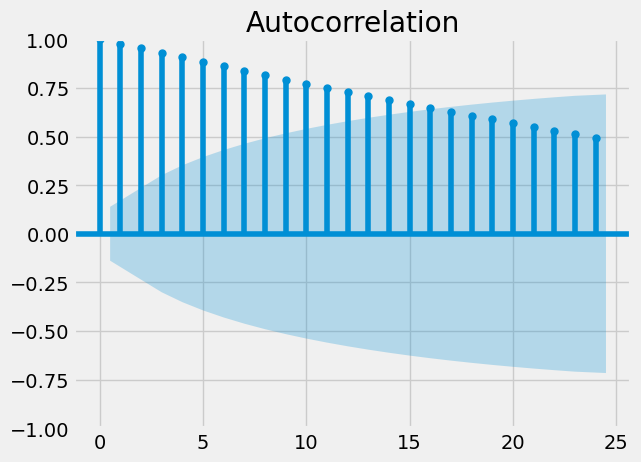

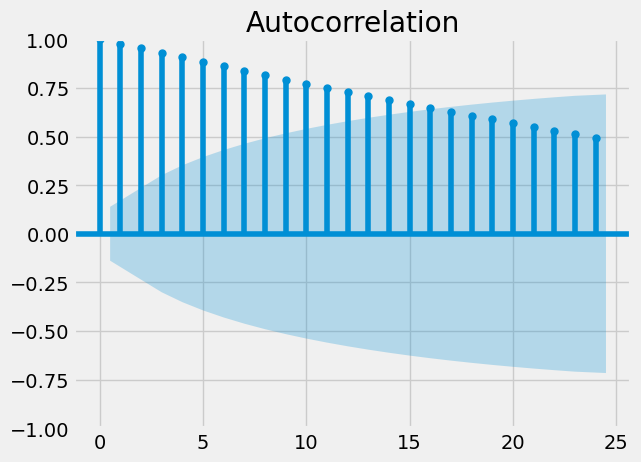

In [114]:
#Visualising auto correlation

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(arima_train['FullyPercent'].values)

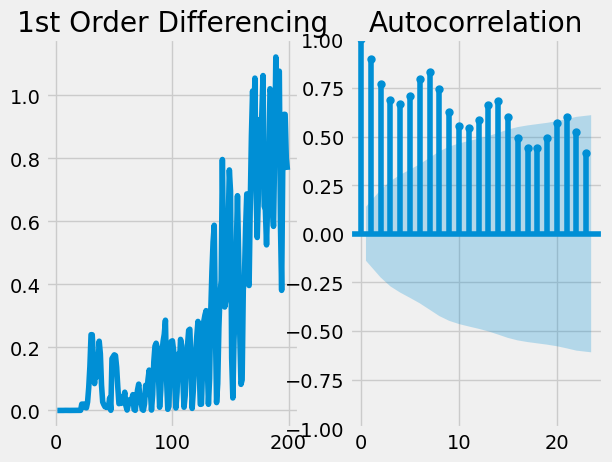

In [115]:
#Visualising first order differencing and auto correlation of training data

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(arima_train['FullyPercent'].diff())

ax2 = f.add_subplot(122)
plot_acf(arima_train['FullyPercent'].diff().dropna(),ax = ax2)
plt.show()

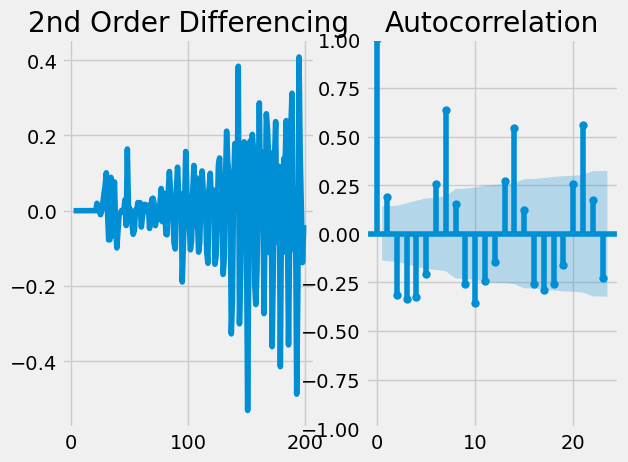

In [116]:
#Visualising second order differencing and auto correlation of training data

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(arima_train['FullyPercent'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(arima_train['FullyPercent'].diff().diff().dropna(),ax = ax2)
plt.show()

In [117]:
#pip install statsmodels

In [118]:
#Performing ad fuller test for stationarity on differenced data

from statsmodels.tsa.stattools import adfuller
result = adfuller(arima_train['FullyPercent'].dropna())
print('p-value: ', result[1])

result = adfuller(arima_train['FullyPercent'].diff().dropna())
print('p-value: ', result[1])

result = adfuller(arima_train['FullyPercent'].diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.9989169259159179
p-value:  0.9599427458185817
p-value:  8.683005827912215e-07


In [119]:
from statsmodels.graphics.tsaplots import plot_pacf

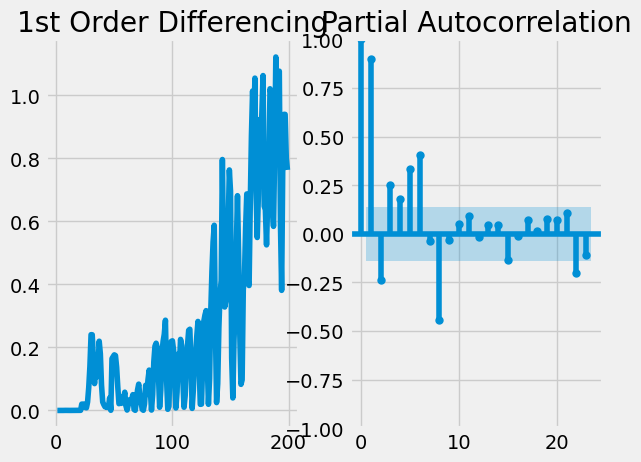

In [120]:
#Visualising partial correaltion of first order differenced data

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st Order Differencing")
ax1.plot(arima_train['FullyPercent'].diff())

ax2 = f.add_subplot(122)
plot_pacf(arima_train['FullyPercent'].diff().dropna(), ax=ax2)
plt.show()

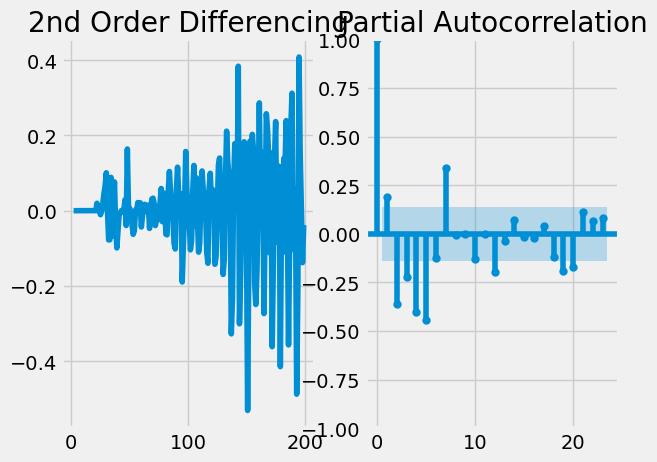

In [121]:
#Visualising partial correaltion of second order differenced data

f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("2nd Order Differencing")
ax1.plot(arima_train['FullyPercent'].diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(arima_train['FullyPercent'].diff().diff().dropna(), ax=ax2)
plt.show()

In [122]:
#Building arima(1,1,2) model 

from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(arima_train['FullyPercent'], order=(1,1,2))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:           FullyPercent   No. Observations:                  200
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 148.933
Date:                Sat, 16 Sep 2023   AIC                           -289.867
Time:                        11:25:58   BIC                           -276.693
Sample:                             0   HQIC                          -284.535
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9980      0.004    253.954      0.000       0.990       1.006
ma.L1         -0.0893      0.046     -1.955      0.051      -0.179       0.000
ma.L2         -0.6159      0.041    -15.171      0.0

In [123]:
arima_train_1 = arima_train[['VaccinationDate', 'FullyPercent']]

In [124]:
arima_train_2 = arima_train_1.set_index('VaccinationDate')

In [125]:
arima_train_2

,FullyPercent
VaccinationDate,
2020-12-29 00:00:00+00:00,0.000625
2020-12-30 00:00:00+00:00,0.000667
2020-12-31 00:00:00+00:00,0.000688
2021-01-01 00:00:00+00:00,0.000688
2021-01-02 00:00:00+00:00,0.000688
...,...
2021-07-11 23:00:00+00:00,48.460556
2021-07-12 23:00:00+00:00,49.400221
2021-07-13 23:00:00+00:00,50.339678


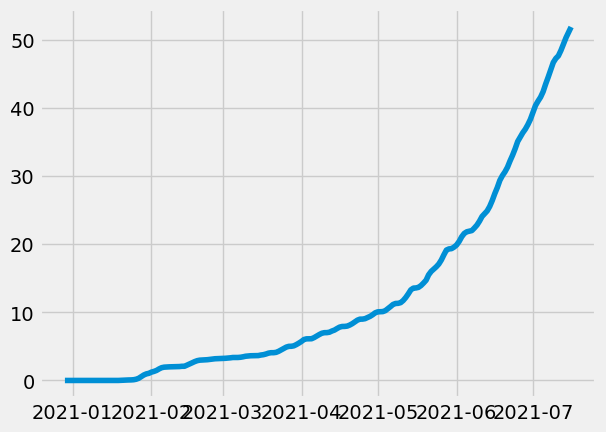

In [126]:
plt.plot(arima_train_2)

In [127]:
df6 = arima_train_2[['FullyPercent']]

In [128]:
df6.reset_index(inplace=True)

In [129]:
df6.shape

(200, 2)

In [130]:
df6

,VaccinationDate,FullyPercent
0,2020-12-29 00:00:00+00:00,0.000625
1,2020-12-30 00:00:00+00:00,0.000667
2,2020-12-31 00:00:00+00:00,0.000688
3,2021-01-01 00:00:00+00:00,0.000688
4,2021-01-02 00:00:00+00:00,0.000688
...,...,...
195,2021-07-11 23:00:00+00:00,48.460556
196,2021-07-12 23:00:00+00:00,49.400221
197,2021-07-13 23:00:00+00:00,50.339678
198,2021-07-14 23:00:00+00:00,51.141133


<Axes: >

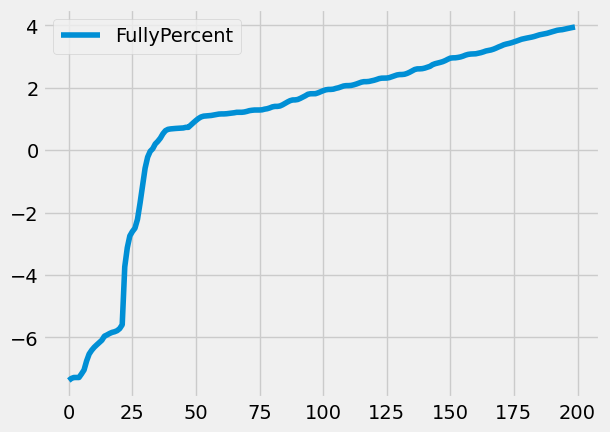

In [131]:
#converting train data to log to reduce variance for prediciton

df7 = np.log(df6[['FullyPercent']])
df7.plot()

In [132]:
df7.reset_index(inplace=True)

In [133]:
df8 = df7['FullyPercent']

In [134]:
df8

0     -7.377450
1     -7.312912
2     -7.282140
3     -7.282140
4     -7.282140
         ...   
195    3.880750
196    3.899955
197    3.918794
198    3.934589
199    3.949403
Name: FullyPercent, Length: 200, dtype: float64

In [135]:
df7

,index,FullyPercent
0,0,-7.377450
1,1,-7.312912
2,2,-7.282140
3,3,-7.282140
4,4,-7.282140
...,...,...
195,195,3.880750
196,196,3.899955
197,197,3.918794
198,198,3.934589


In [136]:
len(df7)-30

170

In [137]:
df8

0     -7.377450
1     -7.312912
2     -7.282140
3     -7.282140
4     -7.282140
         ...   
195    3.880750
196    3.899955
197    3.918794
198    3.934589
199    3.949403
Name: FullyPercent, Length: 200, dtype: float64

In [138]:
#msk = (df7.index < len(df7)-30)
#df_train = df7[msk].copy()
#df_test = df[~msk].copy()

df_test= arima_predict['FullyPercent']
df_test

201    52.777888
202    53.293151
203    53.833110
204    54.390803
205    54.867846
206    55.419808
207    55.776418
208    56.082908
209    56.536423
210    57.111809
211    57.707555
212    58.350733
213    58.873811
214    59.153480
215    59.356376
216    59.700233
217    60.254195
218    60.648483
219    61.304998
220    61.841060
221    62.030160
222    62.283530
223    62.776578
224    63.334270
225    63.999601
226    64.816228
227    65.423207
228    65.551309
229    65.630437
230    66.121610
231    66.693036
232    67.244394
233    67.792271
234    68.271169
235    68.443055
236    68.702072
237    69.029548
238    69.515678
239    69.929910
240    70.343350
241    70.753476
242    70.922403
243    71.114859
244    71.349556
245    71.621890
246    71.887826
247    72.151283
248    72.490762
249    72.714477
250    72.962783
Name: FullyPercent, dtype: float64

In [139]:
df_train = df7
df_train

,index,FullyPercent
0,0,-7.377450
1,1,-7.312912
2,2,-7.282140
3,3,-7.282140
4,4,-7.282140
...,...,...
195,195,3.880750
196,196,3.899955
197,197,3.918794
198,198,3.934589


In [140]:
df_train=df_train.drop(['index'], axis =1)

In [141]:
df8 = np.log(arima_predict[['FullyPercent']])

In [142]:
df8

,FullyPercent
201,3.966092
202,3.975808
203,3.985889
204,3.996195
205,4.004927
206,4.014937
207,4.021351
208,4.026831
209,4.034885
210,4.045011


In [143]:
df_test = df8

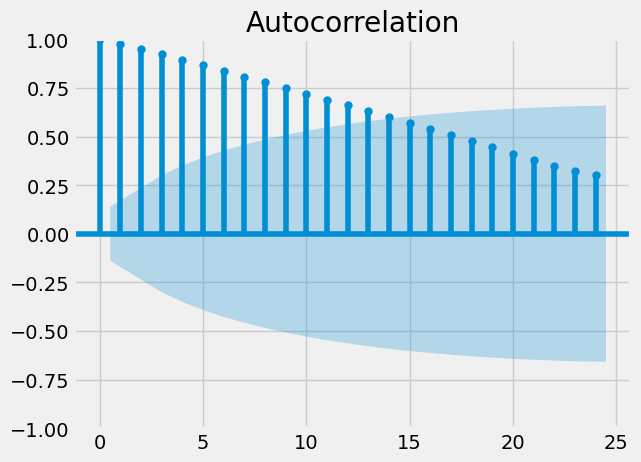

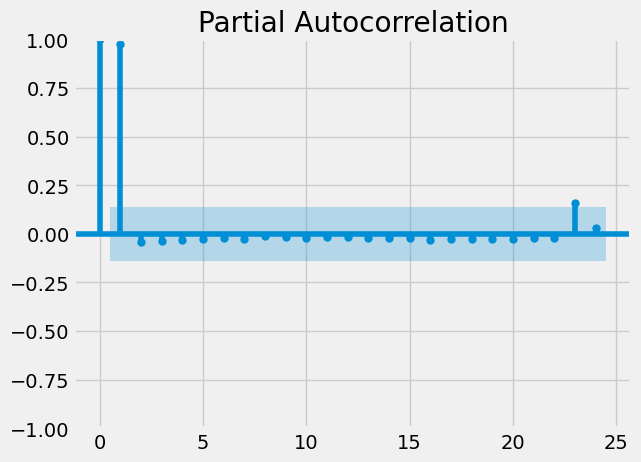

In [144]:
#Visualising autocorrelation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [145]:
#Adfuller test for stationarity


from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.0033500530335194944


<Axes: >

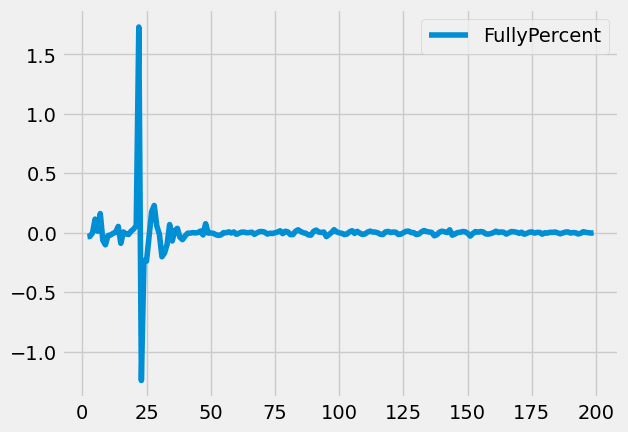

In [146]:
df_train_diff = df_train.diff().diff().dropna()
df_train_diff.plot()

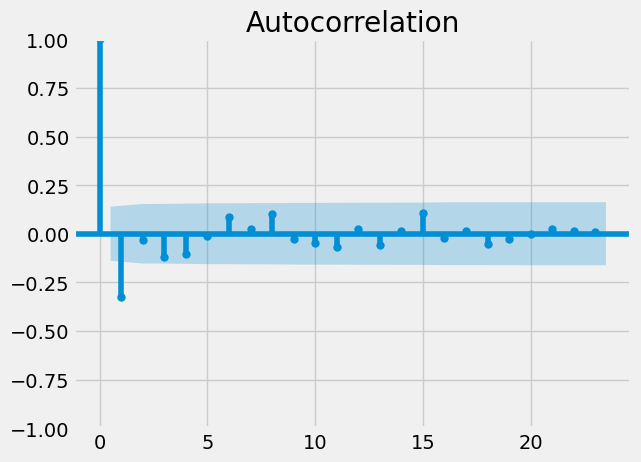

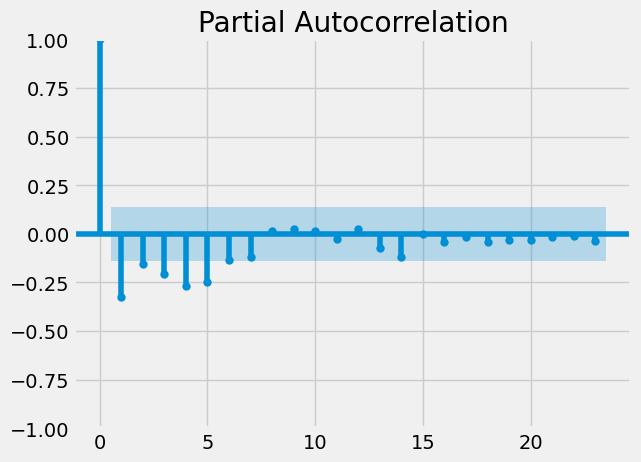

In [147]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [148]:

adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 2.4751469548189053e-15


In [149]:
#Applying ARIMA (1,1,2) model

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           FullyPercent   No. Observations:                  200
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 115.551
Date:                Sat, 16 Sep 2023   AIC                           -223.103
Time:                        11:26:03   BIC                           -209.929
Sample:                             0   HQIC                          -217.771
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9509      0.057     16.695      0.000       0.839       1.063
ma.L1         -0.5516      0.093     -5.957      0.000      -0.733      -0.370
ma.L2         -0.2015      0.109     -1.847      0.0

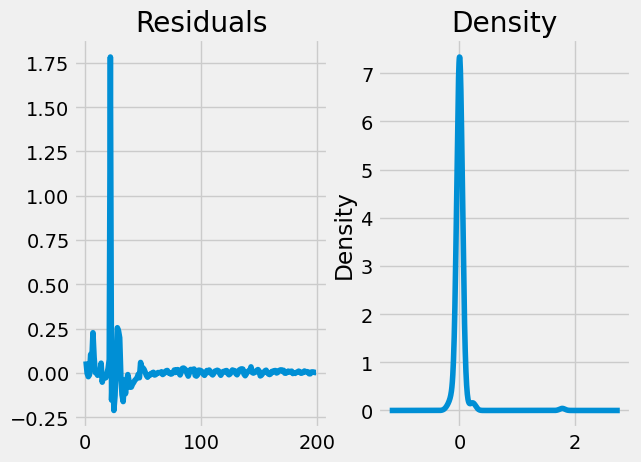

In [150]:

import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

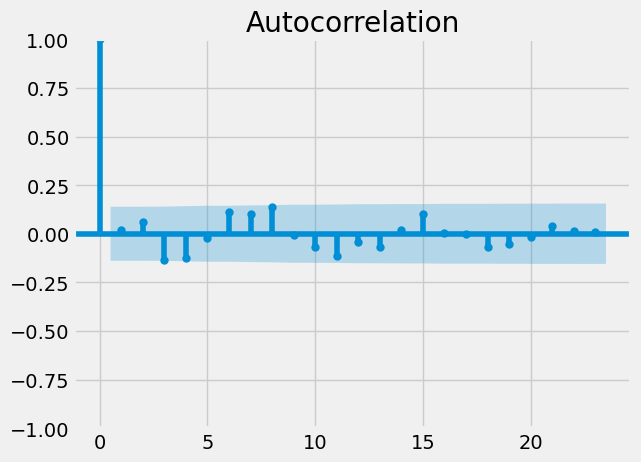

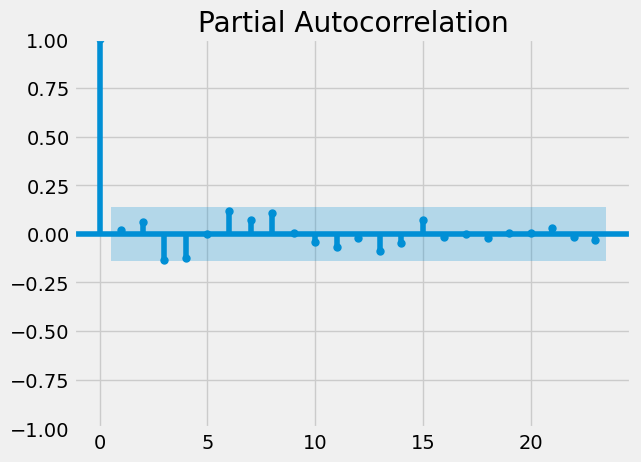

In [151]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

In [152]:
df_train

,FullyPercent
0,-7.377450
1,-7.312912
2,-7.282140
3,-7.282140
4,-7.282140
...,...
195,3.880750
196,3.899955
197,3.918794
198,3.934589


In [153]:
df_test

,FullyPercent
201,3.966092
202,3.975808
203,3.985889
204,3.996195
205,4.004927
206,4.014937
207,4.021351
208,4.026831
209,4.034885
210,4.045011


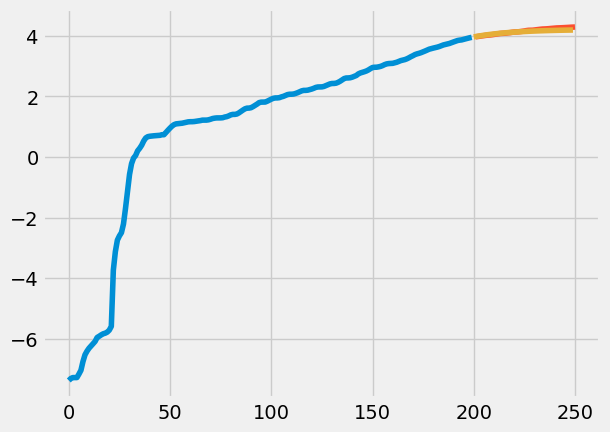

In [154]:
#Visualising logged training, valid and predicited values
forecast_test = model_fit.forecast(len(df_test))
forecast_test

list(forecast_test)

plt.plot(df_train)
plt.plot(df_test)
plt.plot(forecast_test)
#df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)



#df.plot()

In [155]:
#Calculating MAE, MAPE and RMSE of ARIMA (1,1,2)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.03607327525414021
mape - manual: 0.008516369671584062
rmse - manual: 0.049672194787274464


In [156]:
#Getting the exponent of the train data to reverse log to get actual values

df9 = np.exp(df_train)

In [157]:
df9

,FullyPercent
0,0.000625
1,0.000667
2,0.000688
3,0.000688
4,0.000688
...,...
195,48.460556
196,49.400221
197,50.339678
198,51.141133


In [158]:
#Getting the exponent of the forecast data to reverse log to get actual values

forecast_test_reverselog = np.exp(forecast_test)

In [159]:
forecast_test_reverselog

200    52.591578
201    53.239837
202    53.863693
203    54.463714
204    55.040489
205    55.594623
206    56.126738
207    56.637464
208    57.127436
209    57.597294
210    58.047679
211    58.479228
212    58.892575
213    59.288346
214    59.667163
215    60.029634
216    60.376360
217    60.707927
218    61.024913
219    61.327877
220    61.617369
221    61.893922
222    62.158055
223    62.410271
224    62.651059
225    62.880892
226    63.100228
227    63.309510
228    63.509166
229    63.699608
230    63.881233
231    64.054426
232    64.219555
233    64.376976
234    64.527029
235    64.670043
236    64.806332
237    64.936200
238    65.059935
239    65.177818
240    65.290113
241    65.397077
242    65.498955
243    65.595980
244    65.688377
245    65.776360
246    65.860135
247    65.939898
248    66.015836
249    66.088129
Name: predicted_mean, dtype: float64

In [160]:
#Getting the exponent of the test data to reverse log to get actual values

df_test_reverselog = np.exp(df_test)

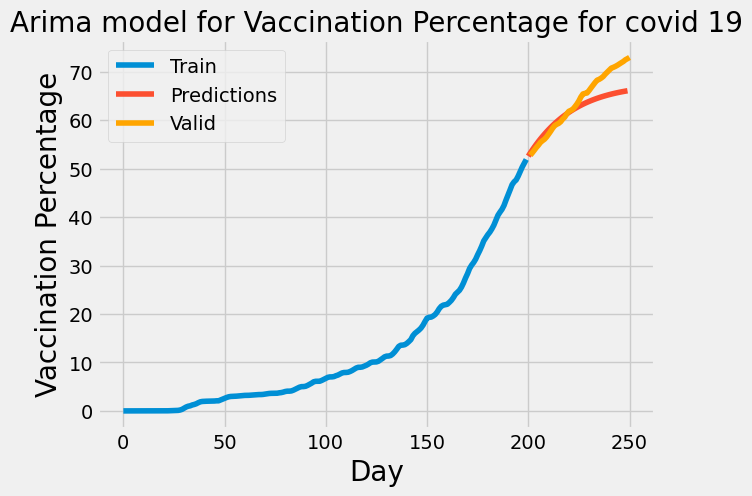

In [161]:
#Visualising the results of the ARIMA (1,1,2) model

plt.plot(df9)
plt.plot(forecast_test_reverselog)
plt.plot(df_test_reverselog, color='orange')
plt.title('Arima model for Vaccination Percentage for covid 19', fontsize=20)
plt.ylabel('Vaccination Percentage', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.legend(['Train', 'Predictions', 'Valid'],loc='upper left');

In [162]:
#Calculating RMSE for actual values

mse = mean_squared_error(df_test_reverselog, forecast_test_reverselog)
>>> rmse = math.sqrt(mse)
>>> print('RMSE: %f' % rmse)

RMSE: 3.372706


In [163]:
df_test_mape=df_test_reverselog['FullyPercent']

In [164]:
forecast_test_reverselog

200    52.591578
201    53.239837
202    53.863693
203    54.463714
204    55.040489
205    55.594623
206    56.126738
207    56.637464
208    57.127436
209    57.597294
210    58.047679
211    58.479228
212    58.892575
213    59.288346
214    59.667163
215    60.029634
216    60.376360
217    60.707927
218    61.024913
219    61.327877
220    61.617369
221    61.893922
222    62.158055
223    62.410271
224    62.651059
225    62.880892
226    63.100228
227    63.309510
228    63.509166
229    63.699608
230    63.881233
231    64.054426
232    64.219555
233    64.376976
234    64.527029
235    64.670043
236    64.806332
237    64.936200
238    65.059935
239    65.177818
240    65.290113
241    65.397077
242    65.498955
243    65.595980
244    65.688377
245    65.776360
246    65.860135
247    65.939898
248    66.015836
249    66.088129
Name: predicted_mean, dtype: float64

In [165]:
#Calculating MAPE for actual values

MAPE(df_test_mape, forecast_test_reverselog)

3.499133791904749

## Section 4.1: Application of AutoArima to vaccination level data

# -----------------------------------------------------------------------

In [166]:
arima_train_2

,FullyPercent
VaccinationDate,
2020-12-29 00:00:00+00:00,0.000625
2020-12-30 00:00:00+00:00,0.000667
2020-12-31 00:00:00+00:00,0.000688
2021-01-01 00:00:00+00:00,0.000688
2021-01-02 00:00:00+00:00,0.000688
...,...
2021-07-11 23:00:00+00:00,48.460556
2021-07-12 23:00:00+00:00,49.400221
2021-07-13 23:00:00+00:00,50.339678


In [167]:
sndf = arima_train_2['FullyPercent'].values
sndf

array([6.25193000e-04, 6.66872000e-04, 6.87712000e-04, 6.87712000e-04,
       6.87712000e-04, 7.71071000e-04, 8.75270000e-04, 1.16702700e-03,
       1.45878300e-03, 1.64634100e-03, 1.81305900e-03, 1.95893800e-03,
       2.10481600e-03, 2.27153400e-03, 2.58413100e-03, 2.68832900e-03,
       2.81336800e-03, 2.91756700e-03, 2.98008600e-03, 3.08428500e-03,
       3.29268300e-03, 3.73031800e-03, 2.38615290e-02, 4.40135800e-02,
       6.42698300e-02, 7.38769610e-02, 8.22128660e-02, 1.09179520e-01,
       1.82285409e-01, 3.22141061e-01, 5.62736128e-01, 8.02935239e-01,
       9.65381194e-01, 1.05057415e+00, 1.22433609e+00, 1.33091064e+00,
       1.47414233e+00, 1.69385596e+00, 1.87341136e+00, 1.95408208e+00,
       1.98121545e+00, 1.99961696e+00, 2.01126639e+00, 2.02347849e+00,
       2.03289807e+00, 2.04390146e+00, 2.08389297e+00, 2.08449732e+00,
       2.24908977e+00, 2.41935064e+00, 2.59580091e+00, 2.77008385e+00,
       2.90754293e+00, 2.98221180e+00, 3.00369760e+00, 3.02726737e+00,
      

In [168]:
val =sndf

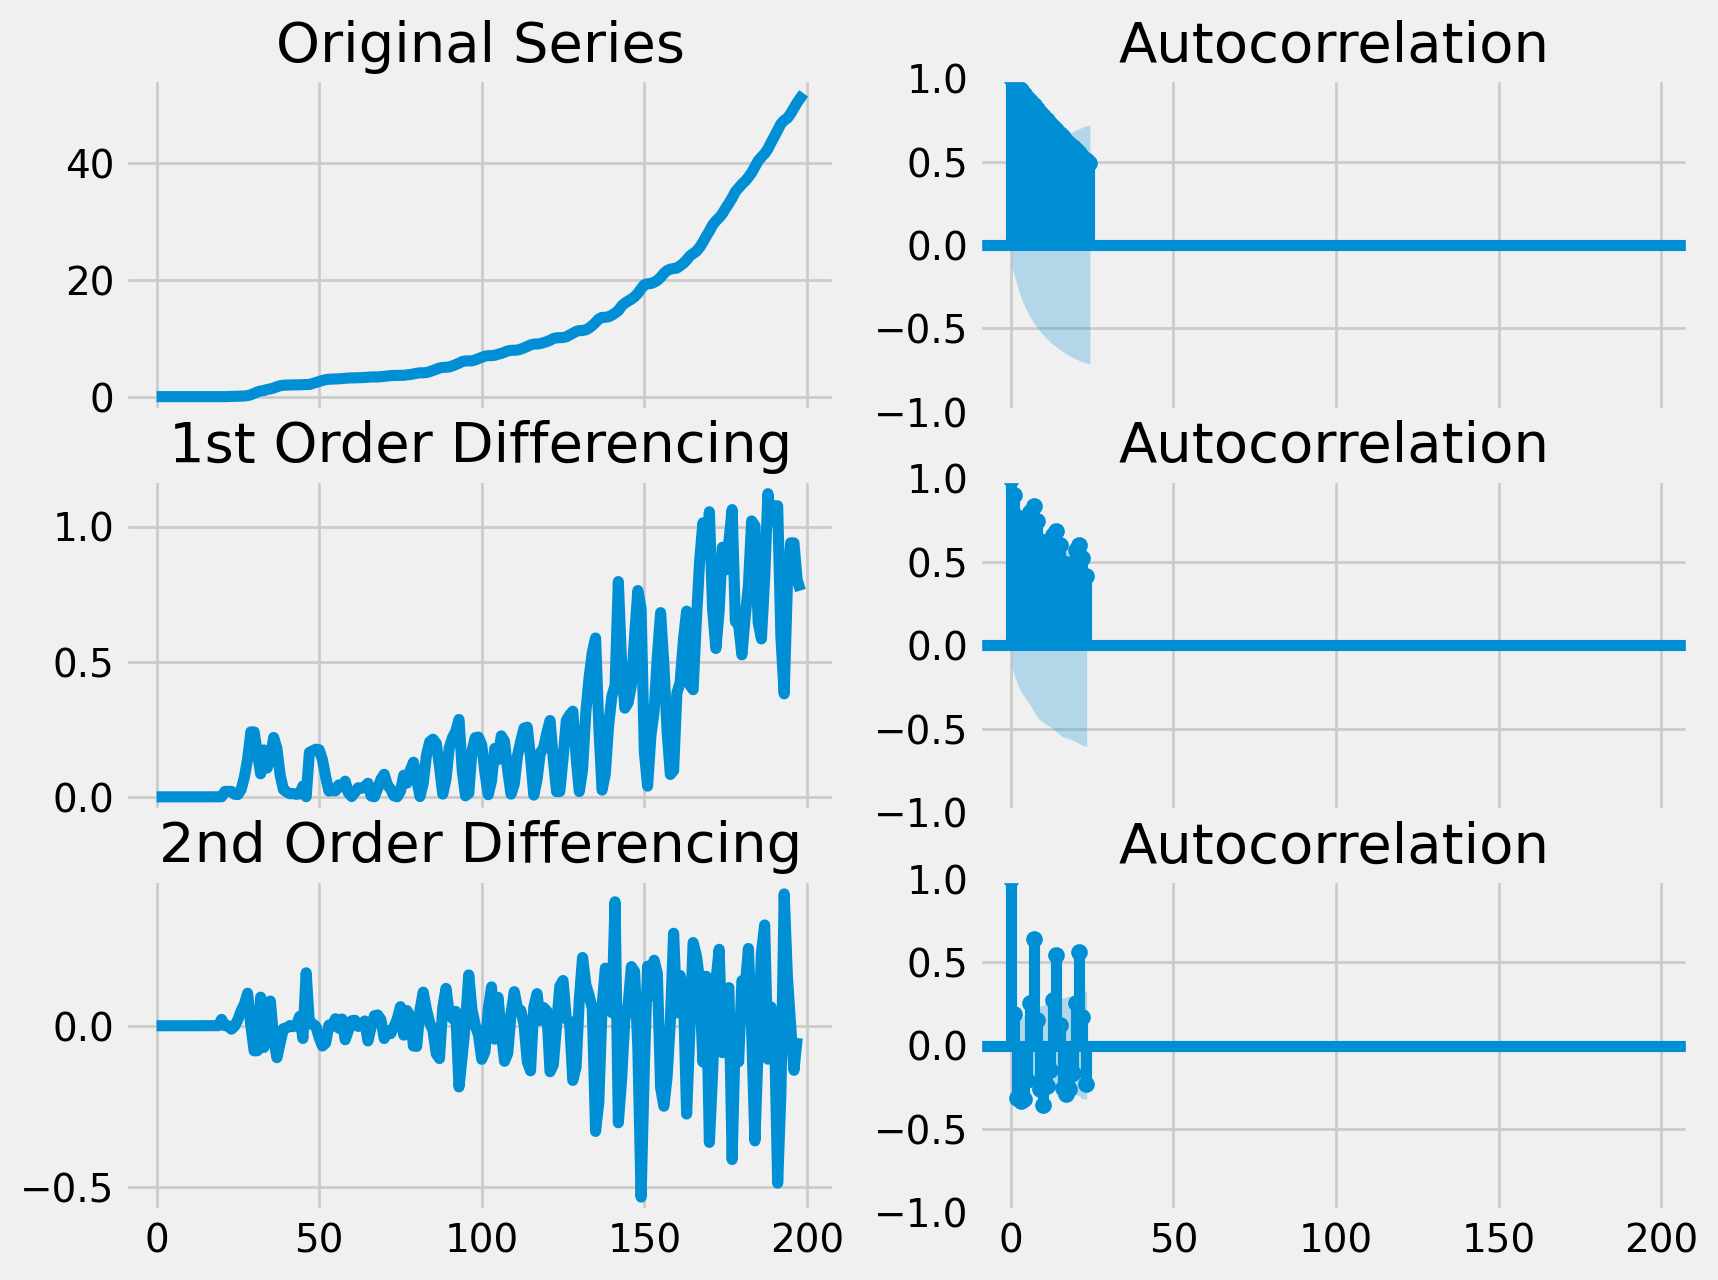

In [169]:
#Visualising orders of differenced data and corresponding autocorrelation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':200})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])

plt.show()

Text(0.5, 1.0, 'Original Series')

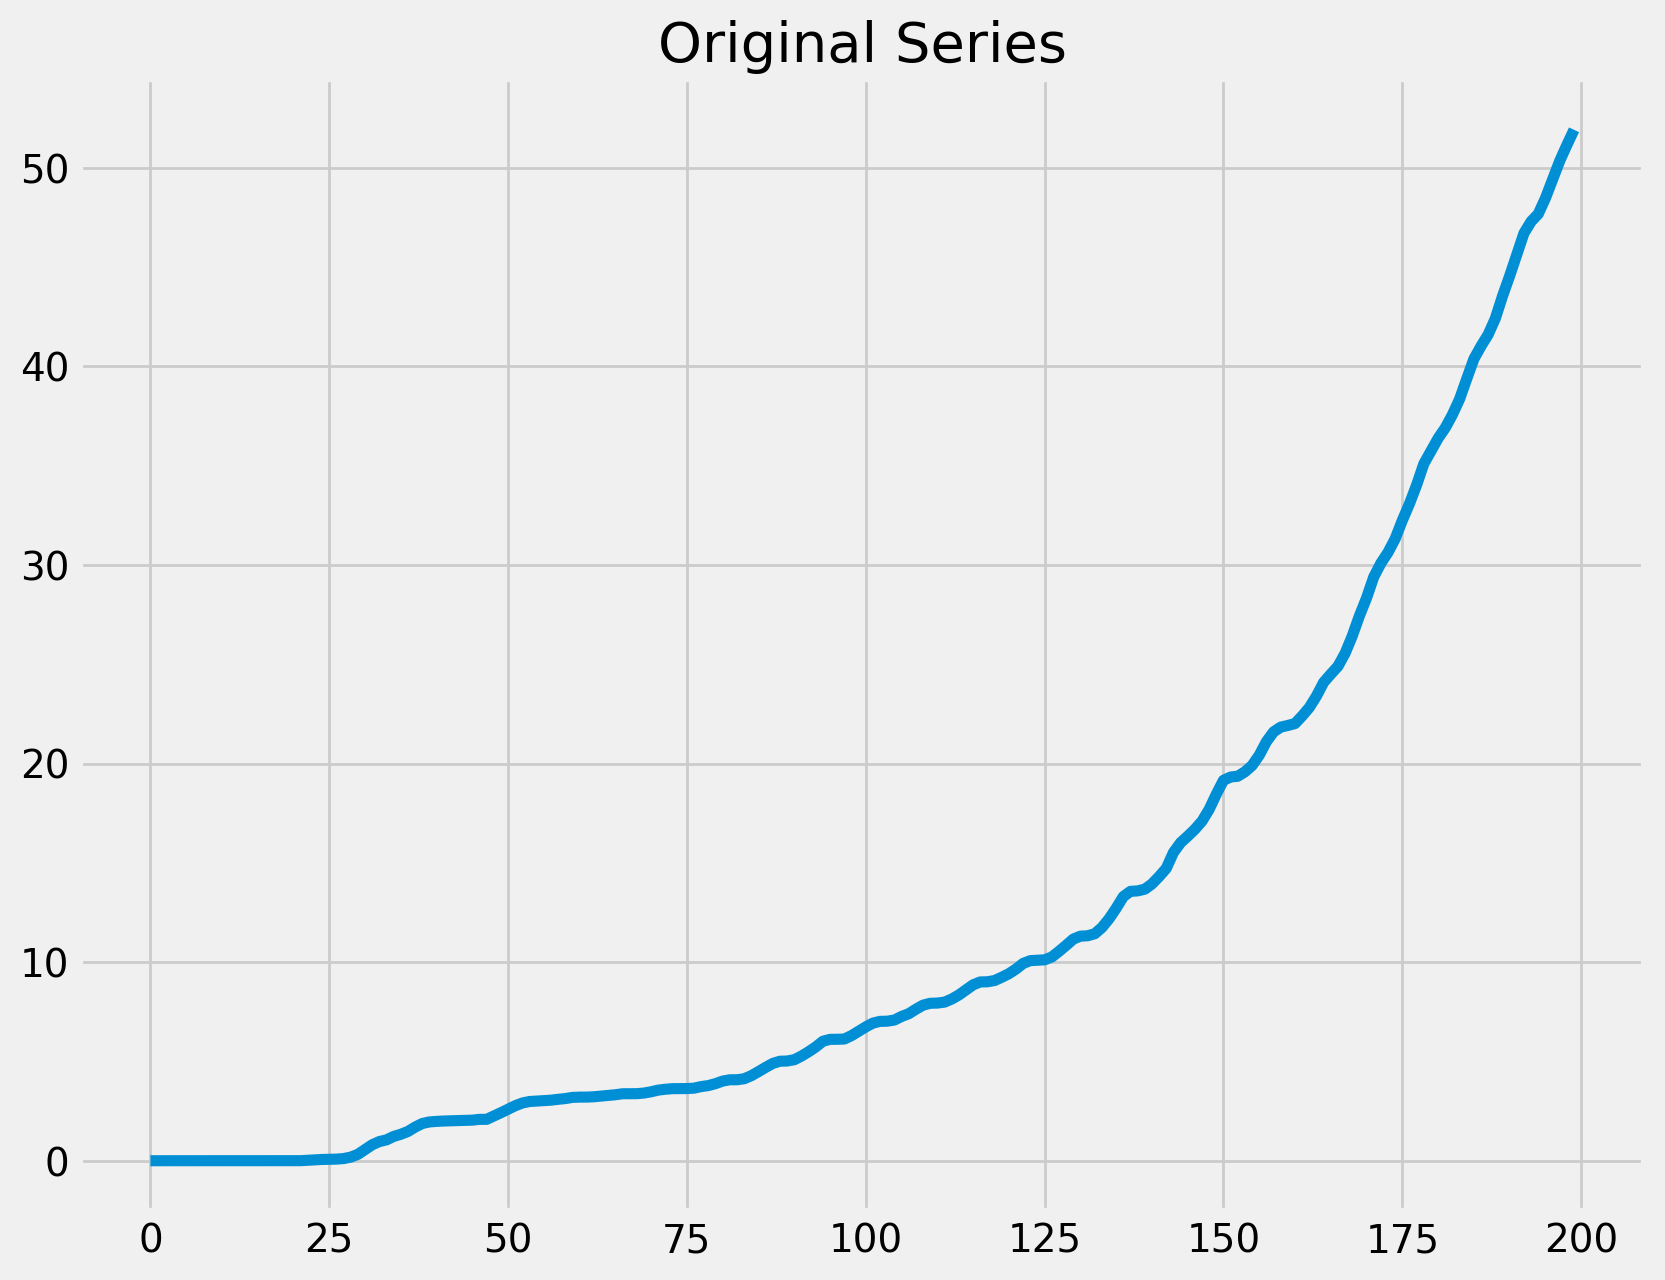

In [170]:

plt.plot(val); axes[0, 0].set_title('Original Series')
plt.title('Original Series')

Text(0.5, 1.0, '1st Order Differencing')

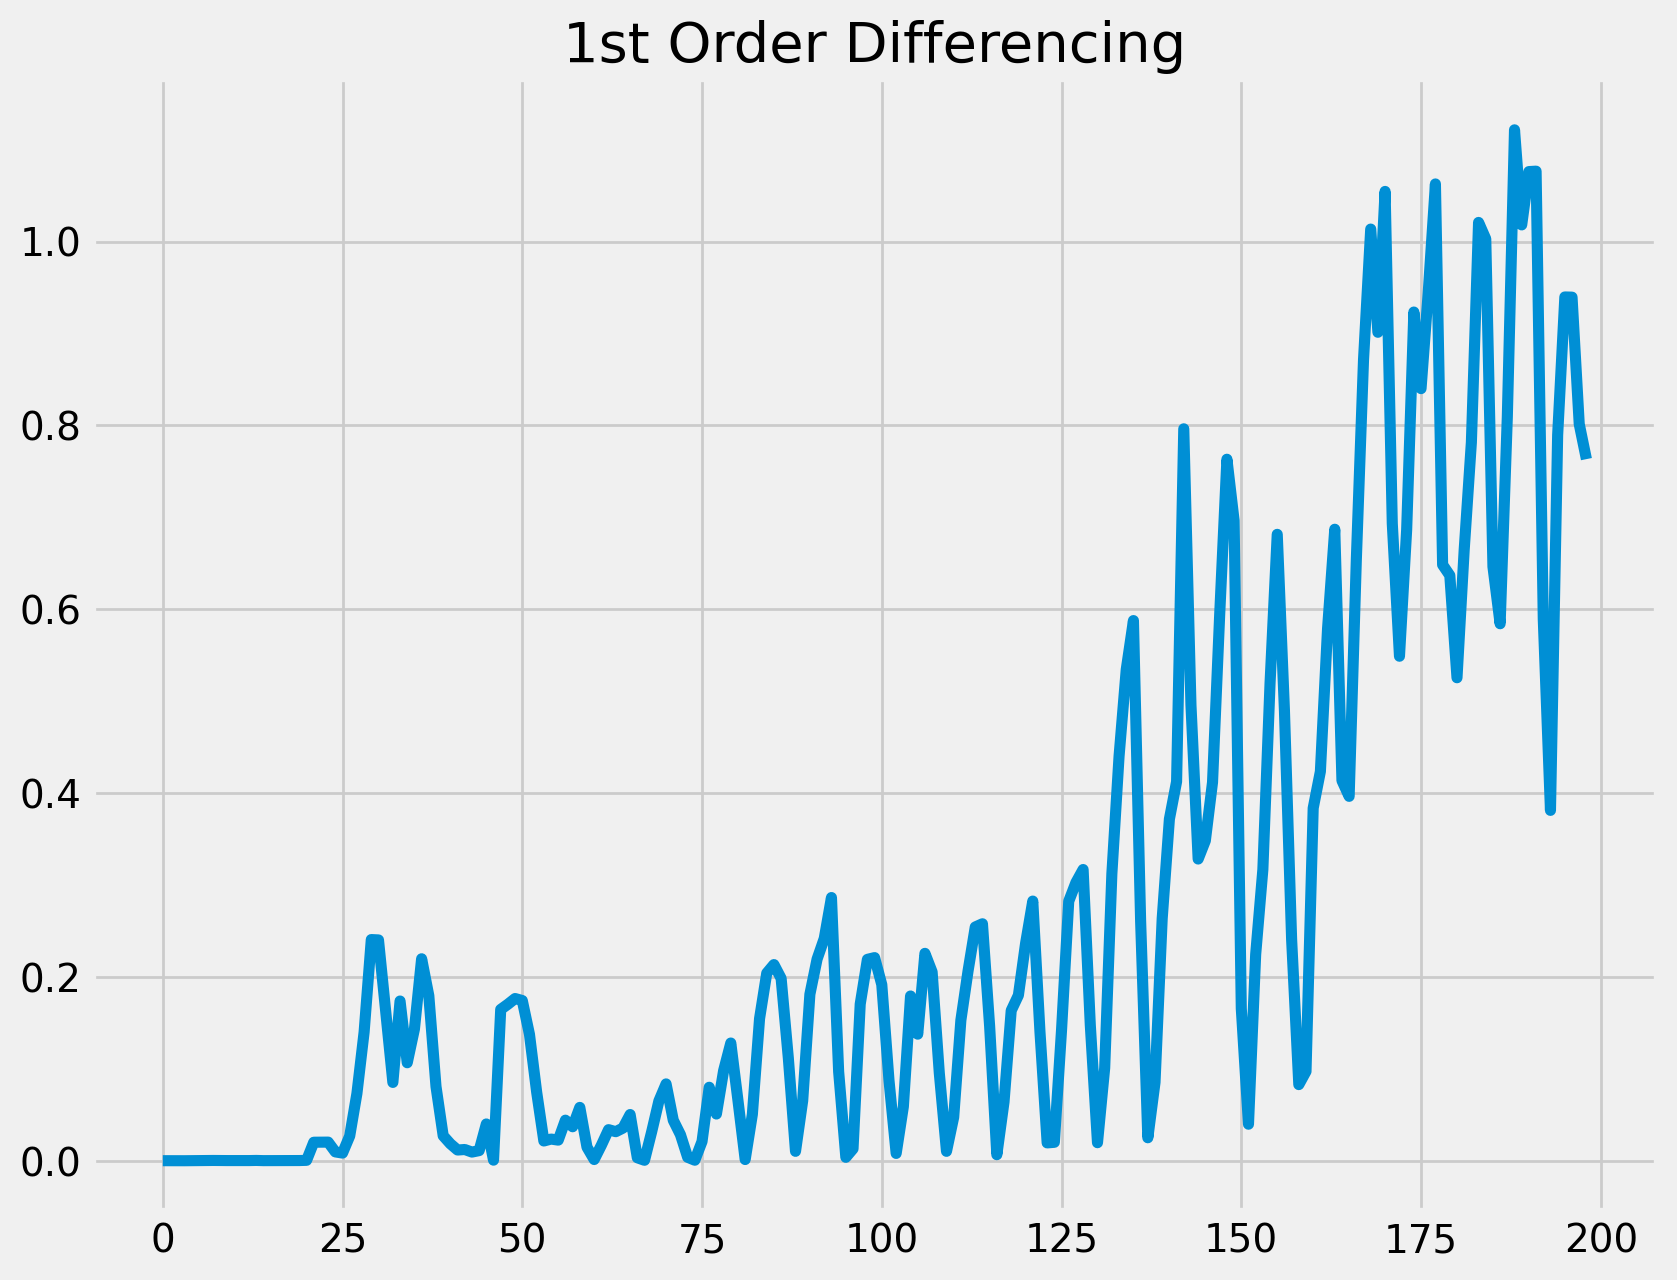

In [171]:
plt.plot(np.diff(val))
plt.title('1st Order Differencing')

Text(0.5, 1.0, '2nd Order Differencing')

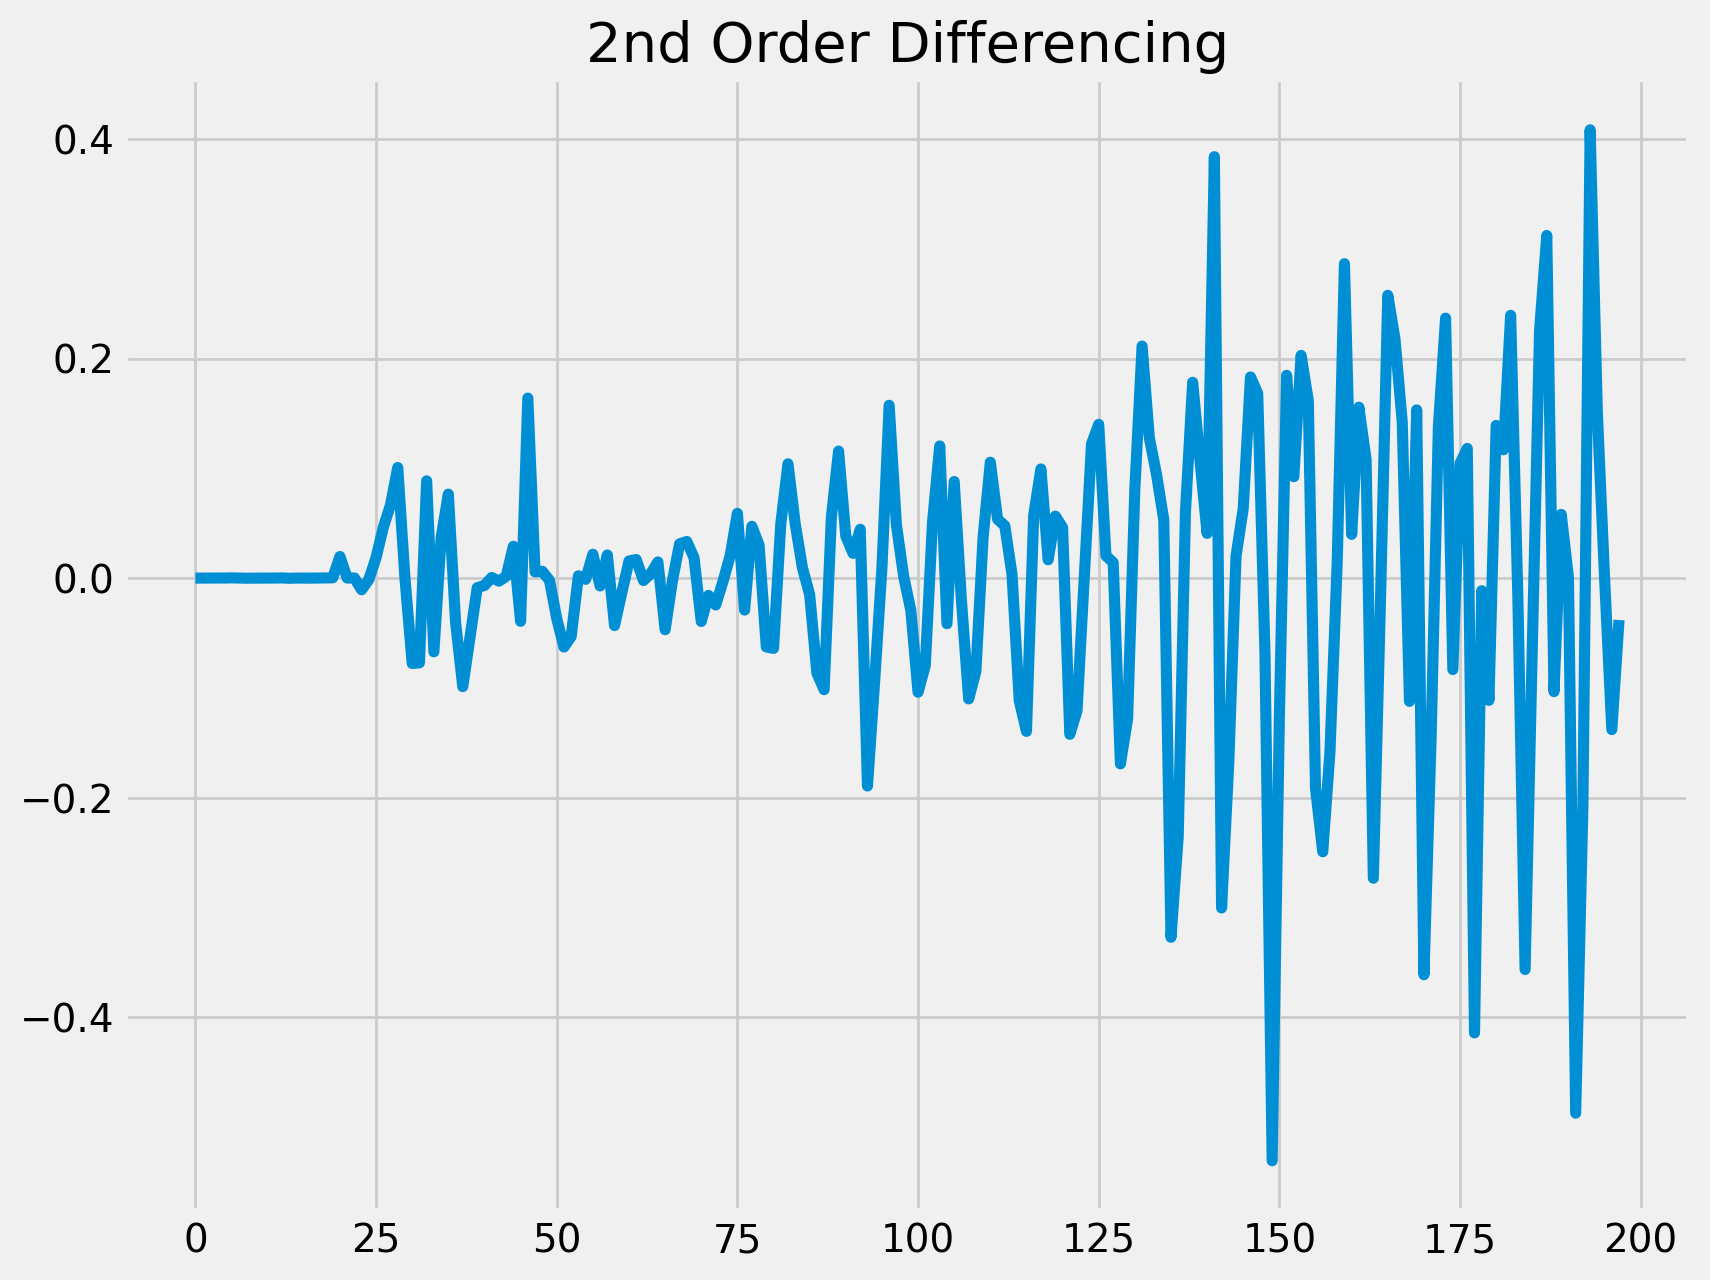

In [172]:
plt.plot(np.diff(diffval))
plt.title('2nd Order Differencing')

Text(0.5, 1.0, '3rd Order Differencing')

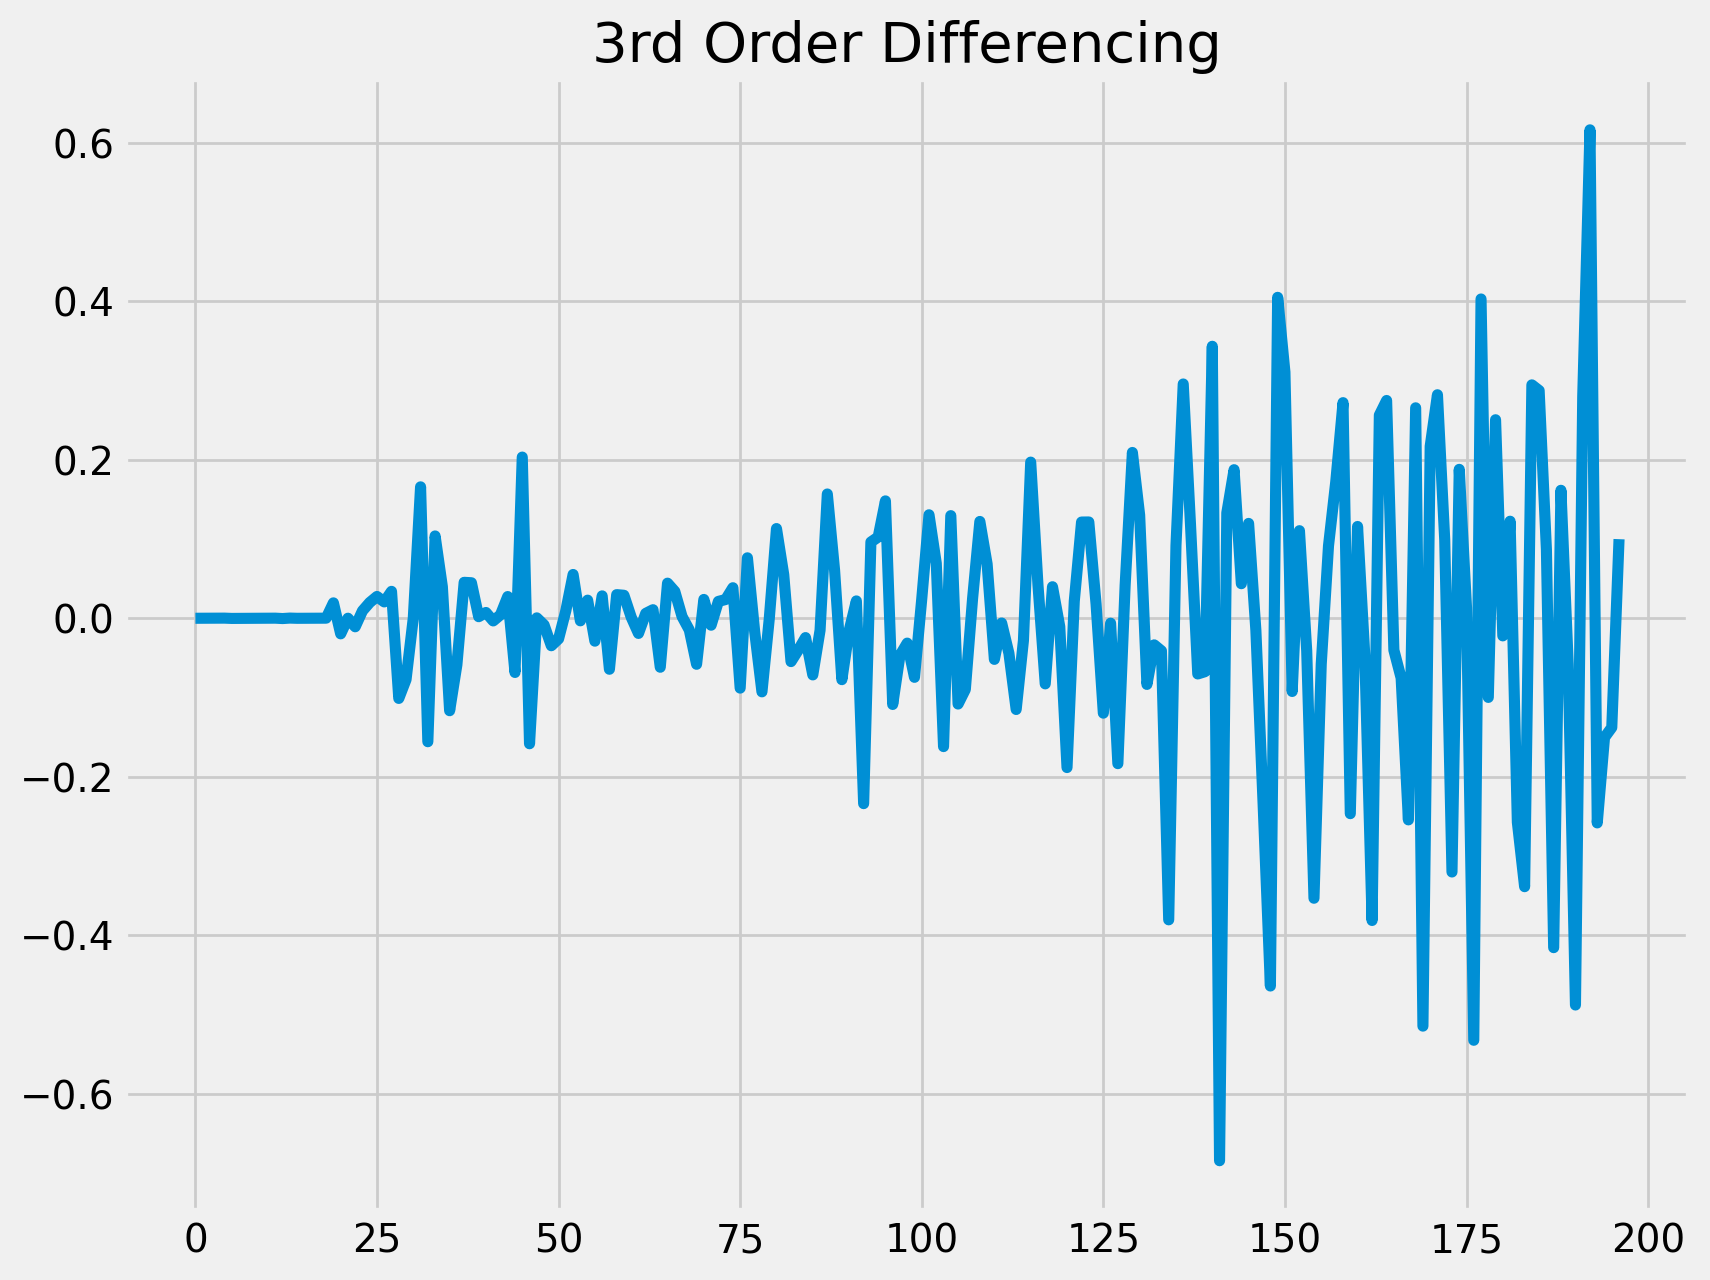

In [173]:
plt.plot(np.diff(np.diff(diffval)))
plt.title('3rd Order Differencing')

In [174]:
#pip install pmdarima

In [175]:
#Auto arima model implementation

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(val, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-258.402, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-242.479, Time=0.02 sec


/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-247.458, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-255.285, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-244.305, Time=0.01 sec


/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-318.344, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-273.081, Time=0.06 sec


/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-318.551, Time=0.22 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-281.102, Time=0.08 sec


/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-309.432, Time=0.31 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-317.063, Time=0.13 sec

Best model:  ARIMA(3,2,1)(0,0,0)[0] intercept
Total fit time: 1.561 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(3, 2, 1)   Log Likelihood                 165.276
Date:                Sat, 16 Sep 2023   AIC                           -318.551
Time:                        11:26:15   BIC                           -298.822
Sample:                             0   HQIC                          -310.565
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

/Users/gavindavis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


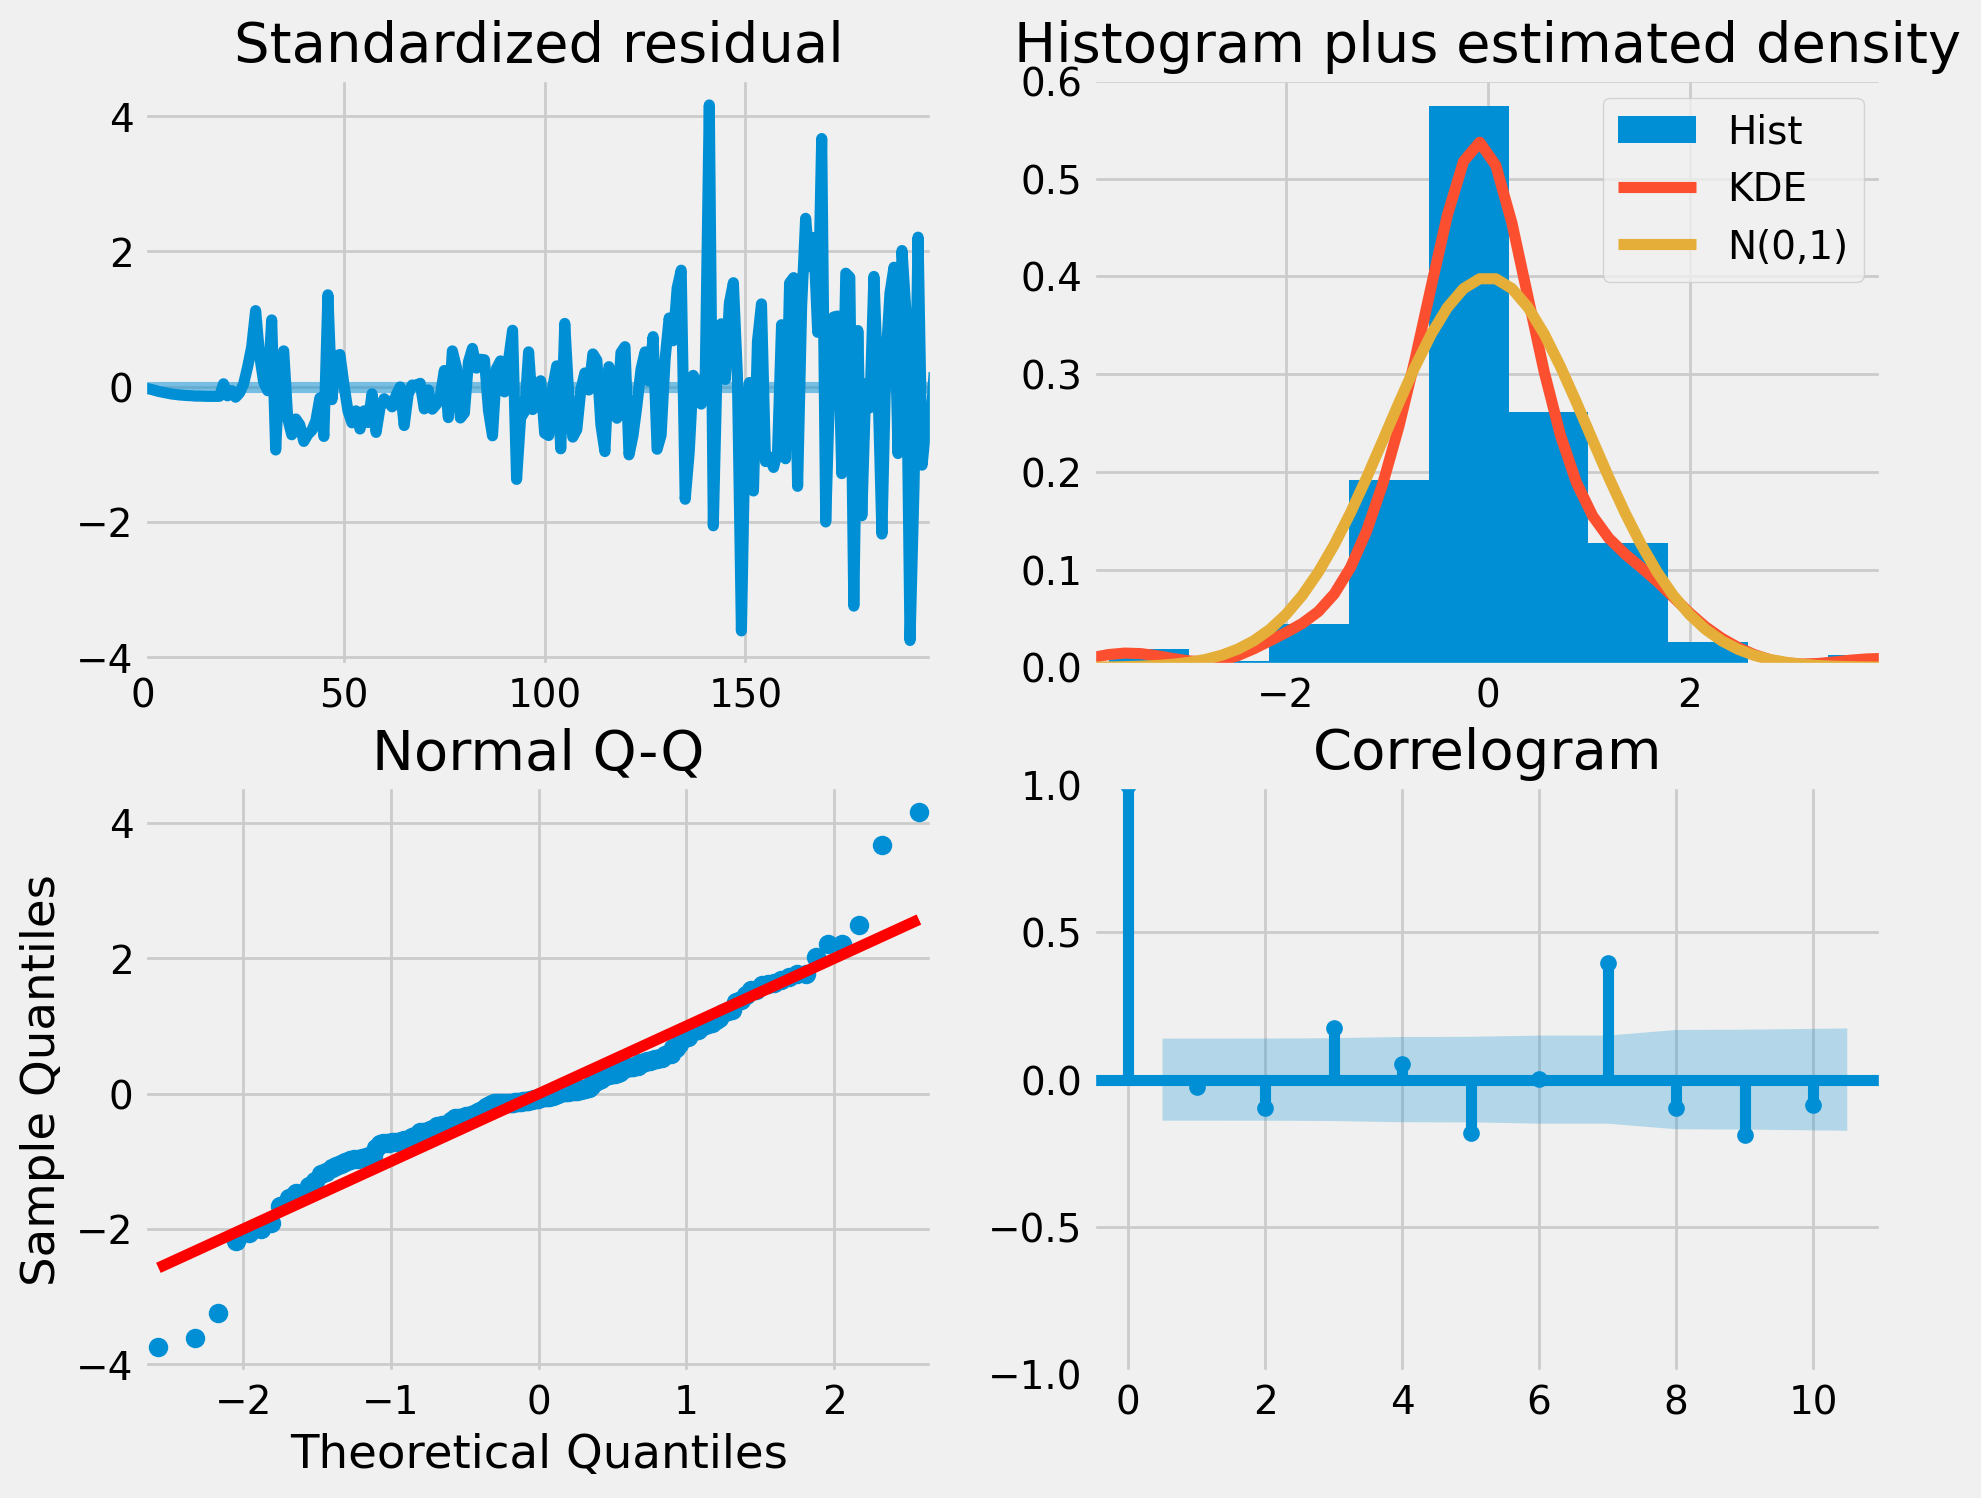

In [176]:
#Assessing residuals of the differenced data

model.plot_diagnostics(figsize=(10,8))
plt.show()

In [177]:
arima_predict

,index,X,Y,VaccinationDate,VaccineText,Dose1,Dose2,SingleDose,Dose1Cum,Dose2Cum,SingleDoseCum,PartiallyVacc,FullyVacc,PartialPercent,FullyPercent,ObjectId
201,427,-856336.3149,7036491.651,2021-07-17 23:00:00+00:00,Sun 18 Jul 2021,16879,15842,1934,2860799,2364009,168548,3029347,2532557,63.130874,52.777888,428
202,428,-856336.3149,7036491.651,2021-07-18 23:00:00+00:00,Mon 19 Jul 2021,24925,18472,6253,2885724,2382481,174801,3060525,2557282,63.780616,53.293151,429
203,429,-856336.3149,7036491.651,2021-07-19 23:00:00+00:00,Tue 20 Jul 2021,30616,18210,7700,2916340,2400691,182501,3098841,2583192,64.579113,53.833110,430
204,430,-856336.3149,7036491.651,2021-07-20 23:00:00+00:00,Wed 21 Jul 2021,30387,19866,6895,2946727,2420557,189396,3136123,2609953,65.356061,54.390803,431
205,431,-856336.3149,7036491.651,2021-07-21 23:00:00+00:00,Thu 22 Jul 2021,33562,15953,6938,2980289,2436510,196334,3176623,2632844,66.200071,54.867846,432
206,432,-856336.3149,7036491.651,2021-07-22 23:00:00+00:00,Fri 23 Jul 2021,27108,20870,5616,3007397,2457380,201950,3209347,2659330,66.882032,55.419808,433
207,433,-856336.3149,7036491.651,2021-07-23 23:00:00+00:00,Sat 24 Jul 2021,15456,14835,2277,3022853,2472215,204227,3227080,2676442,67.251583,55.776418,434
208,434,-856336.3149,7036491.651,2021-07-24 23:00:00+00:00,Sun 25 Jul 2021,14746,13661,1046,3037599,2485876,205273,3242872,2691149,67.580685,56.082908,435
209,435,-856336.3149,7036491.651,2021-07-25 23:00:00+00:00,Mon 26 Jul 2021,23872,18340,3422,3061471,2504216,208695,3270166,2712911,68.149485,56.536423,436
210,436,-856336.3149,7036491.651,2021-07-26 23:00:00+00:00,Tue 27 Jul 2021,25540,23938,3672,3087011,2528154,212367,3299378,2740521,68.758256,57.111809,437


In [178]:
arima_predict_1 = arima_predict['FullyPercent']

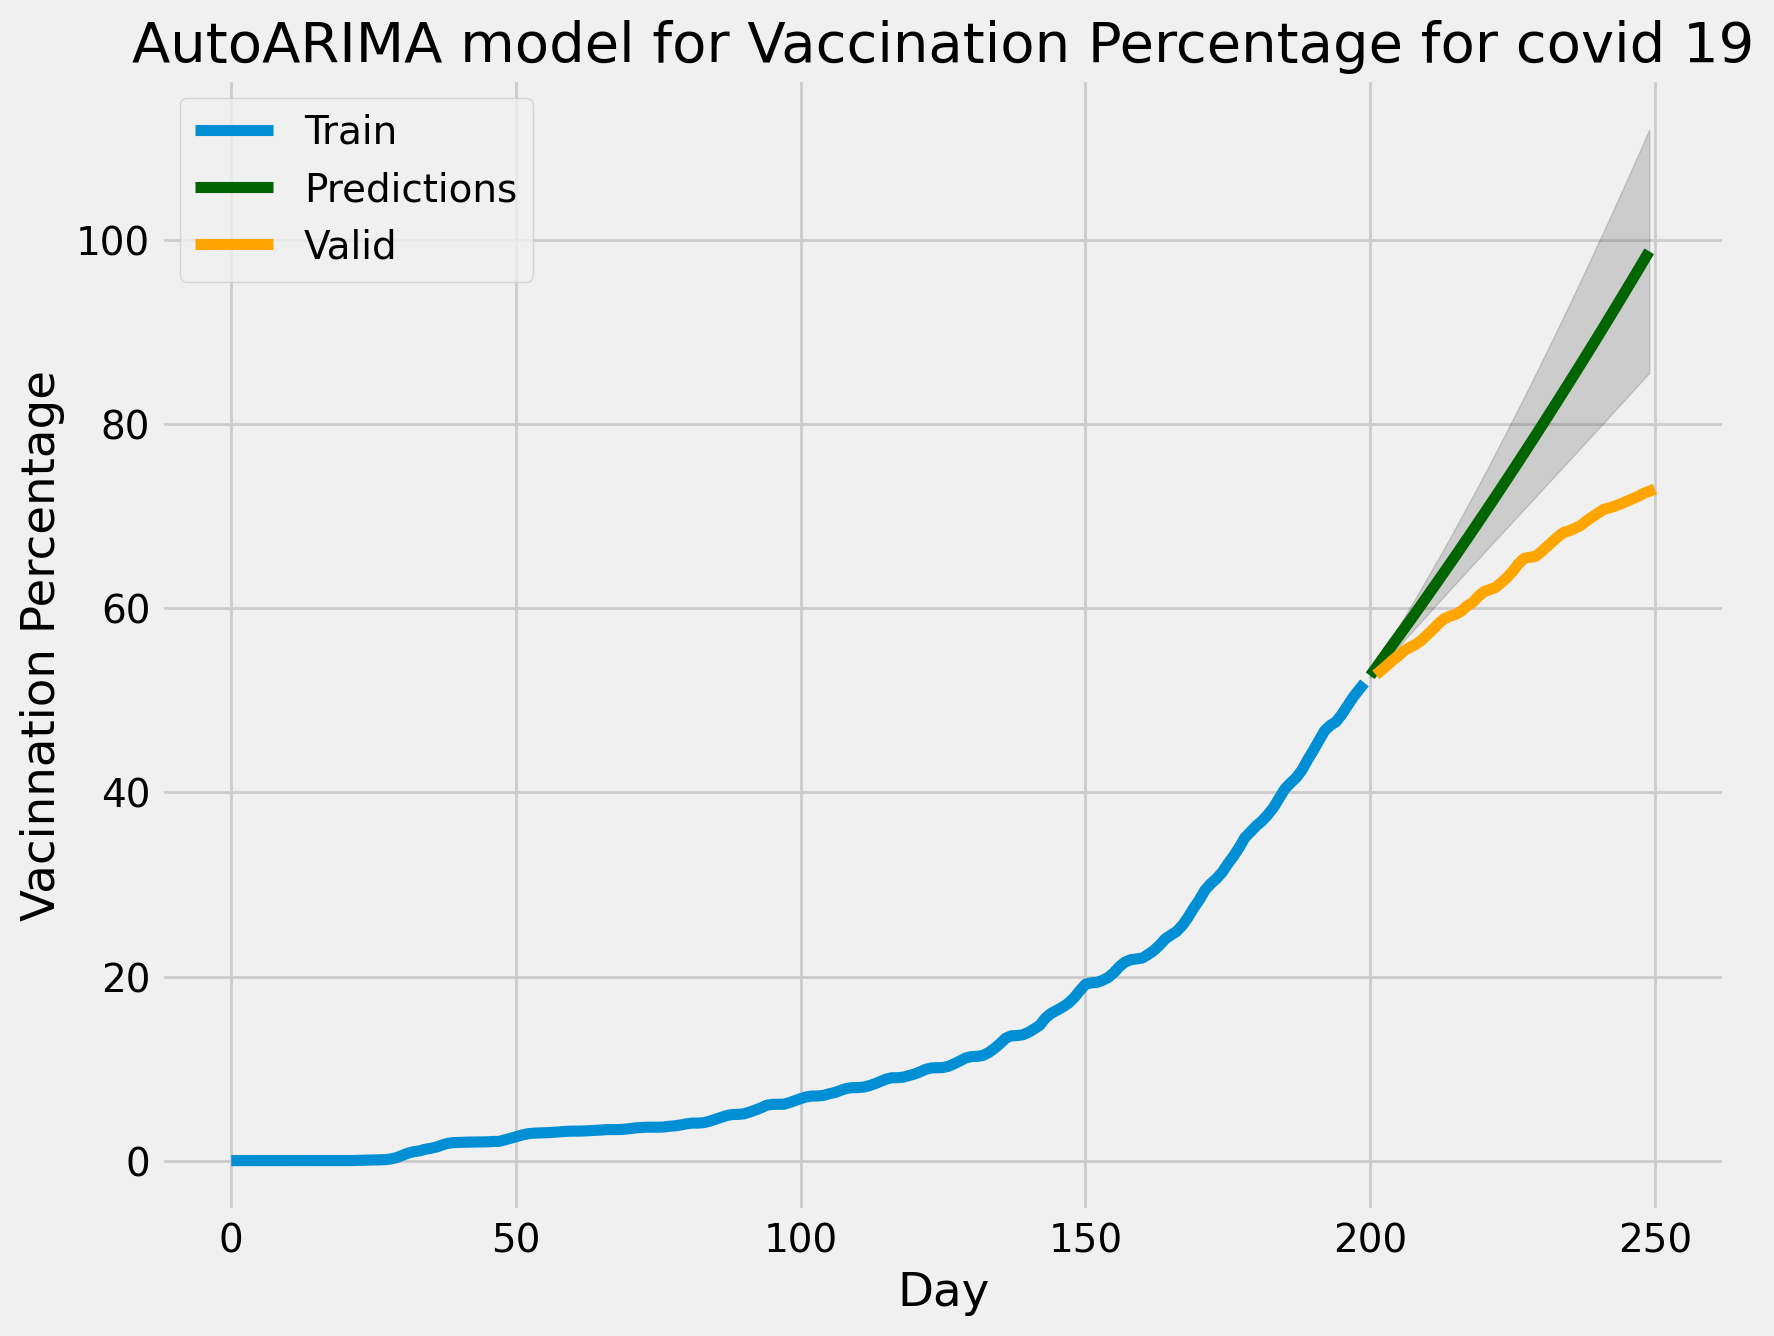

In [179]:
#Plotting the auto Arima model

# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(val), len(val)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(val)
plt.plot(fc_series, color='darkgreen')
plt.plot(arima_predict_1, color='orange')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("AutoARIMA model for Vaccination Percentage for covid 19")
plt.ylabel('Vaccination Percentage')
plt.ylabel('Vacinnation Percentage')
plt.xlabel('Day')
plt.legend(['Train', 'Predictions', 'Valid'], loc='upper left')
plt.show()

In [180]:
 mse = mean_squared_error(arima_predict_1, fc_series)
>>> rmse = math.sqrt(mse)
>>> print('RMSE: %f' % rmse)

RMSE: 13.363052


In [181]:
fc_series

200    52.684829
201    53.515113
202    54.382677
203    55.257496
204    56.118940
205    56.966370
206    57.811900
207    58.667225
208    59.535779
209    60.413547
210    61.294669
211    62.176157
212    63.058838
213    63.945327
214    64.837552
215    65.735700
216    66.638753
217    67.545649
218    68.456023
219    69.370192
220    70.288676
221    71.211763
222    72.139404
223    73.071372
224    74.007488
225    74.947725
226    75.892166
227    76.840909
228    77.793989
229    78.751383
230    79.713046
231    80.678949
232    81.649095
233    82.623503
234    83.602190
235    84.585159
236    85.572404
237    86.563915
238    87.559689
239    88.559728
240    89.564035
241    90.572614
242    91.585464
243    92.602584
244    93.623972
245    94.649628
246    95.679552
247    96.713746
248    97.752209
249    98.794941
dtype: float64

In [182]:
arima_predict_1

201    52.777888
202    53.293151
203    53.833110
204    54.390803
205    54.867846
206    55.419808
207    55.776418
208    56.082908
209    56.536423
210    57.111809
211    57.707555
212    58.350733
213    58.873811
214    59.153480
215    59.356376
216    59.700233
217    60.254195
218    60.648483
219    61.304998
220    61.841060
221    62.030160
222    62.283530
223    62.776578
224    63.334270
225    63.999601
226    64.816228
227    65.423207
228    65.551309
229    65.630437
230    66.121610
231    66.693036
232    67.244394
233    67.792271
234    68.271169
235    68.443055
236    68.702072
237    69.029548
238    69.515678
239    69.929910
240    70.343350
241    70.753476
242    70.922403
243    71.114859
244    71.349556
245    71.621890
246    71.887826
247    72.151283
248    72.490762
249    72.714477
250    72.962783
Name: FullyPercent, dtype: float64

In [183]:
#Calculating MAPE

MAPE(arima_predict_1, fc_series)

17.44173763487316

# END OF FILE